<a href="https://colab.research.google.com/github/samhdez03/Ciencia-de-datos/blob/main/Tarea_5_29_marzo_2023_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **Ciencia de datos**
## Ricardo Gutiérrez Argüelles
## MAEC-CIMAT
## 
## Tarea 5
## 19 de marzo de 2023

# Ejercicio 1

En la Figura 1 se muestran 6 conjuntos de datos en dos dimensiones denotados con A, B, C, D, E y F. En cada uno se usaron dos métodos de clústering, y uno de ellos fue k−means. Los centroides de cada clúster se señalan con una x, ambos ejes son proporcionales y en la misma escala para todos los conjuntos de datos. Indica, en cada conjunto, cuál solución corresponde a k−means y porqué.


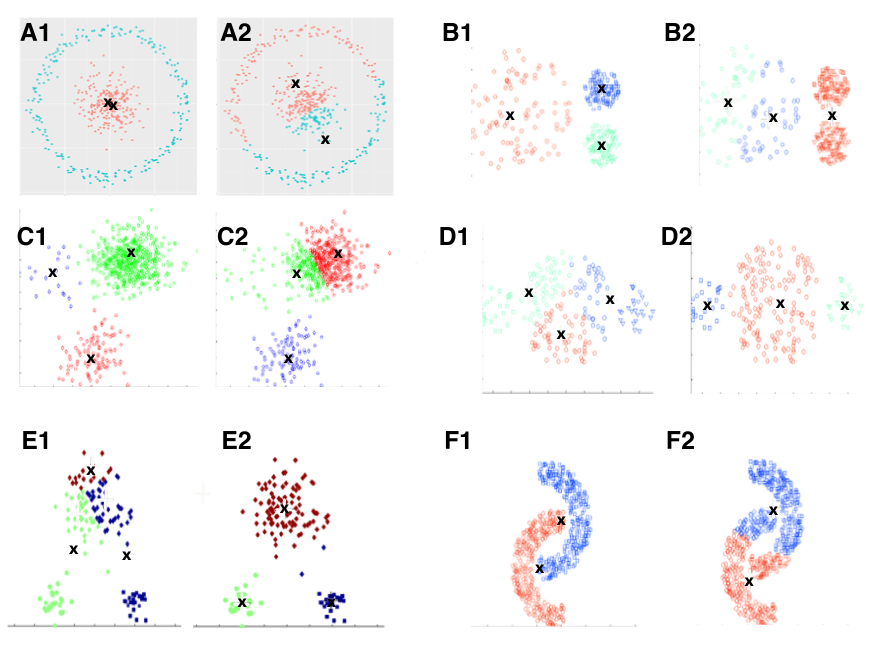

**Solución:**

El método de clústering de K-means, separa las observaciones en el número K de clusters requeridos, para lo cual se establecen igual número de k centroides entre el espacio de datos. La idea es minimizar la distancia que hay entre las observaciones y el lugar en donde se localizan los k centroides, a fin de formar los k clústeres. Esta distancia es euclideana (lineal)

Por lo tanto, es importante analizar cuáles serían los números (k) de clústeres que se requieren y con base en ello optimizar (de forma heurística) la localización de los centroides, a fin de minimizar la suma de las distancias al cuadrado entre la observación y al error (esto es similar a minimizar el error en las técnicas de regresión). 

Con esto en mente, analizamos cada par de gráficos a fin de determinar en cuál se uso el método de k-means.

- A1 y A2. En este caso se uso k-means para A2, ya que se definen dos centroides para formar 2 clústers. Así, los elementos de cada grupo se visualizan en diferente color, en donde los elementos de color rosa están más próximos del centroide localizado en la parte superior, mientras que los elementos en color azul están más cercanos del centroide localizado en la parte inferior de la gráfica. A1 no puede ser ya que los dos centroides están en el centro y aún así se forman dos grupos en donde se ignora la distancia mínima que hay al centroide.
- B1 y B2. Se utilizó k-means para B2 ya que se definen tres centroides para formar igual número de clústers. identificados por los colores azul, rojo y verde. Al respecto, los elementos identifcados en cada cluster tienen una distancia mínima al centroide al que pertenecen. Caso contrario es para el gráfico B1, ya que los elementos más a la derecha del clúster rosa, parece que tienen una distancia más cercana al centroide del clúster azul (los de la parte superior a la derecha) y al clúster verde (los de la parte inferior a la derecha).
- C1 y C2. Aquí en C1 parece que se utilizó k-means, debido a que los 3 clústeres se forman de acuerdo a su cercanía al centroide. Asimismo, parece que hubo una optimización para localizar al centroide; a diferencia de C2 en donde en el caso del centroide del custer verde y del cluster rojo forman como una fuerza de "atracción" hacia los elementos cercanos; en donde para el caso de los elementos muy a la izquierda solamente se pueden integrar al clúster verde ya que están muy alejados a los otros centroides, por lo que parece que no se optimizó el lugar donde se debe localizar el centroide,
- D1 y D2. Es el mismo caso que el anterior (C1 y C2) ya que parece que se utilizó k-means en D1, optimizando el lugar del centroide y donde los elementos de cada uno de los 3 clústers están bien definidos de acuerdo a su distancia a dicho centroide. Por otro lado, en el caso de D2, pareciera que no se optimizó el lugar del centroide, ya que los elementos muy arriba y abajo del grupo rosa parecen estar muy alejados al centroide.
- E1 y E2. De igual forma, se utilizó k-means para E2 ya que los centroides de los tres clústers parecen tener la distancia óptima para agrupar a los elementos y formar los clústers, mimimizando la distancia entre los elementos y dicho centro. En el caso de E1, no se utilizó k-means ya qye la distancia de los elementos más arriba de los clústers azul y verde no pertenece al clúster café que es donde se minimiza la distancia al centroide.
- F1 y F2. En este caso, se utilizó K-means para F2, en donde los elementos se asignan de acuerdo a la distancia euclideana entre el centroide y los elementos, en donde en este caso hay dos centroides para lo que se forman dos clústers (azul y rojo). No obstante para F1, se utilizó otra técnica mediante una distancia no lineal para formar los clústers.

# Ejercicio 2

Considera un modelo de mezclas de _k_ distribuciones:

$$
f(x)=\sum^{K}_{k=1}w_k f_k (X)
$$

donde $w_k \ge 0 $ y $\Sigma_k w_k=1$. En este caso, supondremos que $f_k = N (\mu_k, \Sigma_k)$. 

Supón que tienes datos $x_1, x_2, ..., x_n \sim f(x)$, con $x$ y queremos ajustar el modelo de mezclas Gaussianas (GMM) para usarlo como un soft-clustering.

Es fácil ver (no es necesario demostrarlo), que los parámetros de máxima verosimilitud son:

$\mu_k=\frac{1}{n_k} \sum^{n}_{i=1} \gamma_i^k x_i, \ \  \Sigma_k= \frac{1}{n_k} \sum^{n}_{i=1} \gamma_i^k  (x_i - \mu_k)(x_i - \mu_k)', \ \ w_k=\frac{n_k}{n}$

donde $\gamma^k_i$ es una medida de probabilidad de pertenenica de una observación _i_ al cluster _k_.

Implementa un método de clustering usando el algoritmo 1:


---
Algorithm 1 GMM-EM


---




1.   Inicializa los parámetros del modelo y los pesos $w_k$, y obtén el valor inicial de la log-verosimilitud:
$$
log p(X|\mu,\Sigma, w) = \sum^{n}_{i=1}log \sum^{K}_{k=1} w_k N (x_i|\mu _k, \Sigma_k)
$$

2.   _Expectation_ : asigna las "responsabilidades" de cada dato, es decir, la asignación de un dato al cluster $k$, que en este esquema es la probabilidad de que una observación se genere de la distribución $k$:
$$
\gamma_i^k = P(C(i)=k|X=x_i)=\frac{w_kf_k(x_i; \mu _k, \Sigma_k)}
{\sum_k w_kf_k(x_i; \mu _k, \Sigma_k)}
$$

3. _Maximization_ : actualiza los parámetros $\mu _{k}^{new}, \Sigma _{k}^{new}$ y $w _{k}^{new}$ usando las responsabilidades obtenidas. Observa que en este paso, usamos la "asignación suave" de cada punto a un cluster $k$, por lo tanto, cada observación debe ser pesada por su correspondiente responsabilidad, y en consecuencia, el número de puntos "asignados" a algún cluster $k$ será $n_k=\sum^{n}_{i=1}\gamma_i^k$.
4. Repite los pasos 2 y 3 hasta que la log-verosimilitud converja.


---

Prueba tu implementación con un conjunto de datos sintéticos bien escogidos en dos dimensiones y compáralo contra fuzzy $k$-means. Discute los resultados.


In [4]:
pip install python-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Cargamos las liberías y funciones que utilizaremos

#directorio

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/4to semestre/Ciencia de datos/Tarea 5')
data_dir = '/content/drive/MyDrive/Colab Notebooks/4to semestre/Ciencia de datos/Tarea 5/'

Mounted at /content/drive


In [6]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))

import numpy as np
import matplotlib as plt
from scipy.stats import multivariate_normal

import numpy as np
import matplotlib.pyplot as plt
import csv
import random
from matplotlib import image
from scipy.stats import multivariate_normal
import util as util
from util import plot

Comenzamos definiendo las funciones para la matriz de varianzas y covarianzas, así como la función del log verosimilitud

In [7]:
#Definimos la matriz de varianzas y covarianzas 
def MatrizCov(X: np.ndarray, media: np.ndarray):
    delta = np.array(X - media)
    return np.matmul(delta.T, delta) / X.shape[0]

#Definimos la función de log verosimilitud
def logVerosimilitud(X: np.ndarray, pesos: np.ndarray, medias: np.ndarray, covarianzas: np.ndarray):
    densidad = np.zeros(X.shape[0])
    for k in range(len(pesos)):
        densidad += multivariate_normal.pdf(X, medias[k], covarianzas[k])*pesos[k]
    return np.sum(np.log(densidad))

La función "E_step" asigna las "responsabilidades", el algoritmo calcula la probabilidad de que cada punto de datos pertenezca a cada uno de los k grupos en los que se ha decidido dividir los datos. Luego, se actualizan los pesos, las medias y las matrices de covarianza de los grupos en función de estas probabilidades.

In [8]:
#Paso E
def EStep(X: np.ndarray, pesos: np.ndarray, medias: np.ndarray, covarianzas: list):
    K = len(pesos)
    gamma = np.zeros((X.shape[0], K))
    for k in range(K):
        gamma[:,k] = multivariate_normal.pdf(X, medias[k], covarianzas[k]) * pesos[k]
    return gamma / np.sum(gamma, 1).reshape(X.shape[0], 1)


En la fase de Maximización (M-step), se utilizan las probabilidades calculadas en la fase anterior para actualizar los parámetros del modelo, en este caso los pesos, las medias y las matrices de covarianza de los grupos. 

In [9]:
#Paso M
def MStep(X: np.ndarray, gamma: np.ndarray):
    denom = np.sum(gamma, axis=0)
    pesos = denom / X.shape[0]
    medias = np.matmul(X.T, gamma) / denom
    medias = medias.T
    covs = np.array([np.matmul((X - medias[k]).T, (X - medias[k]) * gamma[:,k].reshape(X.shape[0], 1)) / denom[k] for k in range(gamma.shape[1])])
    return pesos, medias, covs

También planteamos las funciones para el cálculo de nuestros parámetros y pesos iniciales que se calcularan con el set de datos que se quieran utilizar

In [10]:
#Inicialización

#Definimos valores iniciales
def MediasIniciales(X : np.ndarray, K : int):
    rows = np.random.randint(0, X.shape[0]-1, size=K)
    return X[rows][:]

def CovIniciales(X : np.ndarray, K:int):
    media = np.average(X, axis=0)
    sigma = MatrizCov(X, media)
    return [np.diag(np.diag(sigma)) for _ in range(K)]

def PesosIniciales(K: int):
    return np.array([1/K for _ in range(K)])


En este caso utilizamos el dataset OldFaithful el cual es un conjunto de datos muy conocido en estadística y aprendizaje automático. Contiene información sobre la actividad de géiser Old Faithful en el Parque Nacional de Yellowstone en Wyoming, Estados Unidos. En particular, contiene la duración de las erupciones (en minutos) y el tiempo de espera entre erupciones (en minutos) para un total de 272 observaciones.

#importación de la base


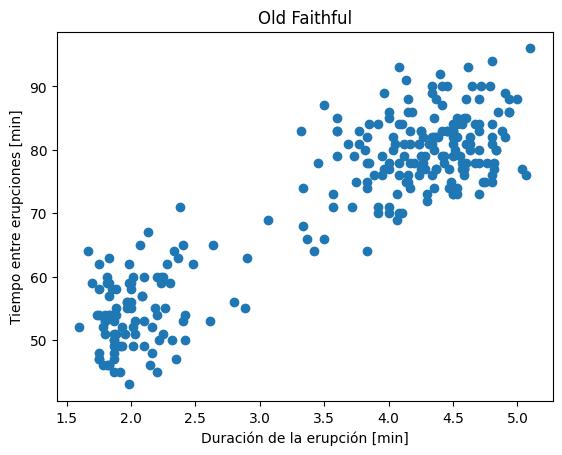

In [11]:
fileindex = os.path.join(data_dir, 'oldFaithful.tsv')
with open(fileindex) as file:
    tsv = csv.reader(file, delimiter='\t')
    cnt = 0
    oldFaithful = [] 
    for line in tsv:
        if cnt != 0:
            oldFaithful.append([float(s) for s in line])
        cnt+=1
data = np.array(oldFaithful)
plt.scatter(data[:,0], data[:,1])
plt.title('Old Faithful')
plt.xlabel('Duración de la erupción [min]')
plt.ylabel('Tiempo entre erupciones [min]')
plt.show()

In [12]:
#with open('C:/Users/Ricardo Gutierrez/oldFaithful.tsv') as file:
#    tsv = csv.reader(file, delimiter='\t')
#    cnt = 0
#    oldFaithful = [] 
#    for line in tsv:
#        if cnt != 0:
#            oldFaithful.append([float(s) for s in line])
#        cnt+=1
#data = np.array(oldFaithful)

#plt.scatter(data[:,0], data[:,1])
#plt.title('Old Faithful')
#plt.xlabel('Duración de la erupción [min]')
#plt.ylabel('Tiempo entre erupciones [min]')
#plt.show()

Al realizar la primera prueba se establece un K de dos, utilizaremos los datos mostrados anteriormente (Old Faithful), se calcula los parámetros iniciales del modelo y los pesos y utilizando los pasos planteados anteriormente se repite el proceso de forma iterativa hasta que se la función de verosimilitud converge

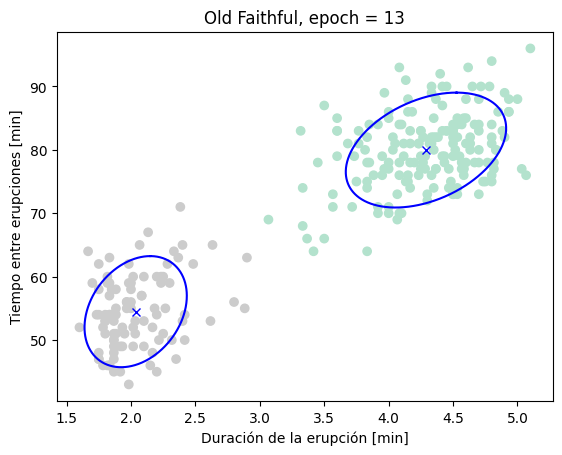

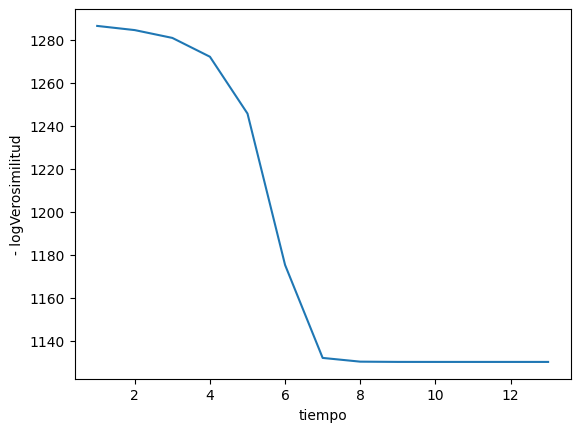

In [13]:
#Primera prubea

np.random.seed(5555)
K = 2
mu = MediasIniciales(data, K)
cov = CovIniciales(data, K)
pesos = PesosIniciales(K)
lim = 1e-5
ll = float('inf')
tiempo = 0
ll_history = []
showIntermediate = False
while True:
    tiempo += 1
    gamma = EStep(data, pesos, mu, cov)
    if showIntermediate and tiempo % 5 == 1:
        # plot!
        plot({
            'data': data,
            'predictions': np.argmax(gamma, axis=1),
            'mu': mu,
            'cov': cov,
            'epoch': tiempo,
            'title': 'Old Faithful',
            'xlabel': 'Eruption duration [min]',
            'ylabel': 'Time between eruptions [min]'
        })
    pesos, mu, cov = MStep(data, gamma)
    newLl = logVerosimilitud(data, pesos, mu, cov)
    ll_history.append(-newLl)
    if abs(newLl - ll) < lim:
        break
    ll = newLl
    
    # removemos clusters
    toDel = []
    for w in range(len(pesos)):
        if pesos[w] < 1/(2*K):
            toDel.append(w)
    pesos = np.delete(pesos, toDel, axis=0)
    mu = np.delete(mu, toDel, axis=0)
    cov = np.delete(cov, toDel, axis=0)

plot({
    'data': data,
    'predictions': np.argmax(gamma, axis=1),
    'mu': mu,
    'cov': cov,
    'epoch': tiempo,
    'title': 'Old Faithful',
    'xlabel': 'Duración de la erupción [min]',
    'ylabel': 'Tiempo entre erupciones [min]'
})
plt.plot(np.arange(1, tiempo+1), ll_history)
plt.xlabel('tiempo')
plt.ylabel('- logVerosimilitud')
plt.show()

## Análisis con Fuzzy Kmeans

In [20]:
!pip install fuzzy-c-means
#Importamos la librería
from fcmeans import FCM
import pandas as pd
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# m es el parámetro de fuzyness
X=data

fcm = FCM(n_clusters=2, m=100)
fcm.fit(X)
probs = np.round(fcm.soft_predict(X),3)
lab = np.matrix(fcm.predict(X)).T
data_fkm = pd.DataFrame(np.concatenate((data,probs,lab),axis=1))
data_fkm.columns = ['x1','x2','p0','p1','cl_fkm']
#print(data_toy_fkm.to_string())
#fcm.fit
data_fkm

x1    x2     p0     p1  cl_fkm
0    3.600  79.0  0.512  0.488     0.0
1    1.800  54.0  0.483  0.517     1.0
2    3.333  74.0  0.505  0.495     0.0
3    2.283  62.0  0.495  0.505     1.0
4    4.533  85.0  0.510  0.490     0.0
..     ...   ...    ...    ...     ...
267  4.117  81.0  0.525  0.475     0.0
268  2.150  46.0  0.493  0.507     1.0
269  4.417  90.0  0.507  0.493     0.0
270  1.817  46.0  0.493  0.507     1.0
271  4.467  74.0  0.505  0.495     0.0

[272 rows x 5 columns]

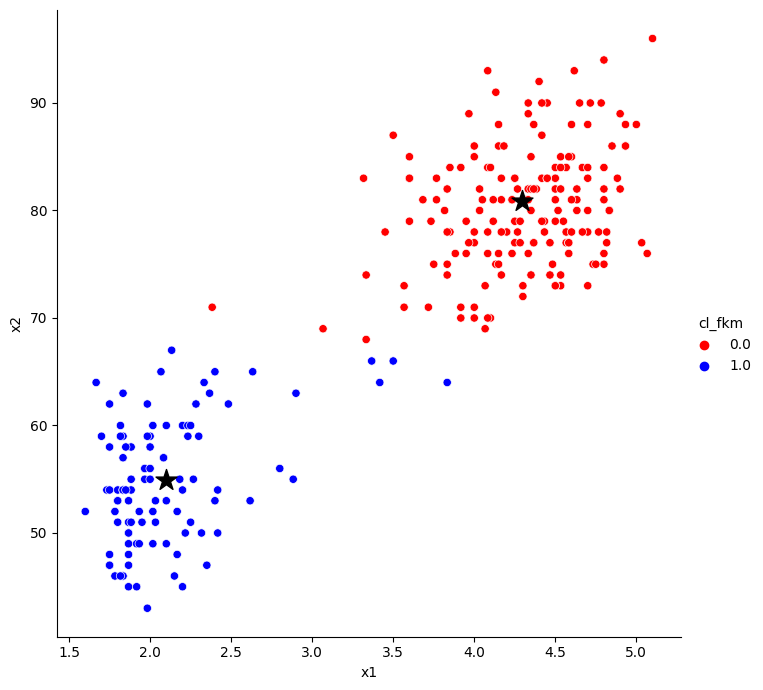

In [22]:
custom_palette = ["red", "blue"]
sns.relplot(x='x1', y='x2', data = data_fkm, hue='cl_fkm', height=7, palette = custom_palette, legend = 'auto')

# plot the centroids
plt.scatter(fcm.centers[:, 0],fcm.centers[:, 1], s=250, marker='*', c='black', edgecolor='black',label='centroids')
plt.show()

**Conclusiones**

En el caso de Fuzzy Kmeans (basado en algoritmos combinatorios) es una forma de clusterización suave, en donde se le asigna una probabilidad a cada elemento para pertenecer a cada cluster (además de considerar la distancia al centrodide), aunque primero parte de una asignación dura. Es por ello que se aprecian elementos identificados en cierto grupo que aunque su distancia esté más cercana al cluster de color contrario.

En el caso de nuestro algoritmo, también es basado en algoritmos combinatorios de los tipo suave, de tipo k-medoids. Lo anterior porque en vez de usar centroides como el dato representativo de cada clúster, usamos otro dato representativo (en este caso la media). Asimismo, como medida de disimilaridad se usa la distancia Gaussiana, en donde tratamos de minimizar esta medida de disimilaridad. En este caso se observan claramente los objetos que pertenecen a otro cluster con base en la distancia que hay a cada dato representativo (media).

En conclusión, el algoritmo generado con base en la distancia gaussiana, permite identificar nitidamente a los elementos de cada grupo sin que se perciban posibles traslapes. 

# Ejercicio 3

Los datos que se encuentran en el archivo IMM_2020.xls corresponden al índice de marginación (IM) por cada municipio del país, calculado por el consejo nacional de población (CONAPO) en 2020, y es hasta la fecha, el más reciente. El archivo contiene también los valores de varios indicadores que representan "nueve formas de exclusión de la marginación en las dimensiones: educación, vivienda, distribución de la población e ingresos monetarios;"$^1$, y fueron construidos en base a la información del censo de población y vivienda 2020 realizado por INEGI. Estos indicadores se usan para calcular el IM según se describe en la _Nota técnico-metodológica_$^2$. El índice de marginación por municipio se muestra de forma categorizada en la Figura 2.


---

$^1$Nota técnico-metodológica para el índice de marginación por entidad federativa y municipio 2020. CONAPO.

$^2$ ver Nota_tecnica_IMEyM_2020.pdf.



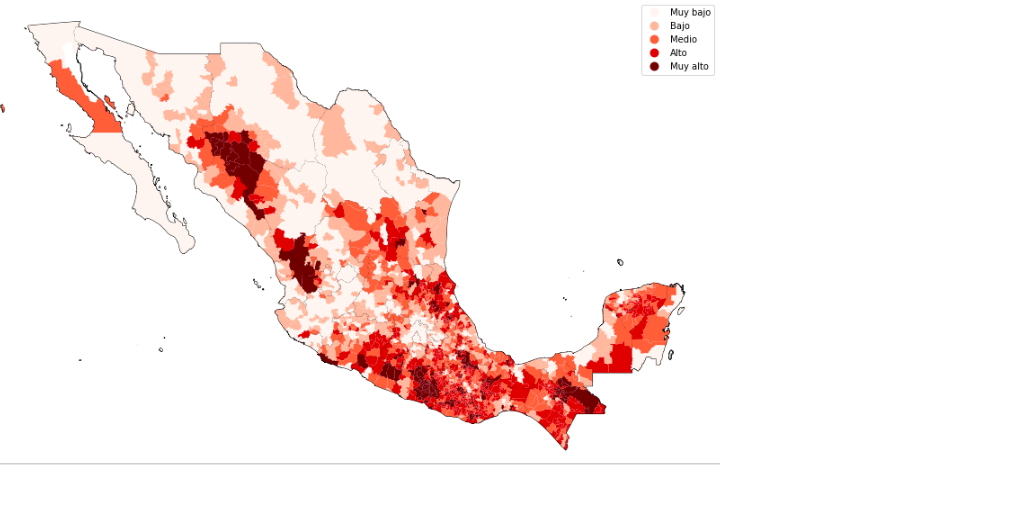

a) Realiza un análisis de clústering con $k$-means usando los 9 indicadores de CONAPO. ¿Puedes agrupar los municipios según su grado de marginación? ¿Qué efecto tiene en el resultado la estandarización de los datos?

b) Repite el ejercicio anterior usando $p$ componentes principales obtenidos con PCA y Kernel PCA (elige el valor de $p$ y justifícalo). ¿Qué puedes decir respecto a los resultados obtenidos? Realiza una visualización de los resultados en una (o unas) gráfica(s) de dos dimensiones. ¿Detectas patrones interesantes?

El resultado de éste ejercicio debe ser un reporte breve y claro con tus hallazgos y/o conclusiones, usando las ilustraciones informativas que creas apropiadas$^3$.


---


$^3$En *grafica_im_municipal2020.py* se encuentra un script en python que usé para visualizar el IM mediante la Figura 2. Puedes usarlo o modificarlo para éste ejercicio si deseas.

## a)

Primero, cargaremos los datos de la base de Índice de Marginación de CONAPO, en donde seleccionaremos las 9 variables de interés: "ANALF", "SBASC", "OVSDE", "OVSEE", "OVSAE", "OVPT", "VHAC", "PL.5000" y "PO2SM".

Posteriormente, haremos un análisis de codo para ver el número de clúster sugeridos. Y posteriormente analizaremos los clúster con pares de variables. Cabe señalar que la base de CONAPO sugiere 5 clústeres para analizar la marginación (con base en el indicador de Marginación 2020), los cuales son: Muy bajo; Bajo; Medio: Alto y; Muy Alto.

#modificación de directorio

In [23]:
import os
import pandas as pd
import numpy as np
import os
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

##data_dir = 'C:/Users/Ricardo Gutierrez'
#from google.colab import drive
#drive.mount('/content/drive')

#import os
#os.chdir('/content/drive/MyDrive/Colab Notebooks/4to semestre/Ciencia de datos/Tarea 5')

#data_dir = '/content/drive/MyDrive/Colab Notebooks/4to semestre/Ciencia de datos/Tarea 5/'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.8 MB/s eta 0:00:00


**Cargamos las bases**

In [24]:
fileindex = os.path.join(data_dir, 'national/national_estatal.shp')
base = gpd.read_file(fileindex)
fileindex = os.path.join(data_dir, 'mg2021_integrado_tarea/conjunto_de_datos/00mun.shp')
layer = gpd.read_file(fileindex, index_col='CVEGEO')
layer = layer.to_crs("EPSG:4326") # corrige el sistema de coordenadas de referencia para los municipios

**Cargamos las librerías que utilizaremos para el análisis de clústers**

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Graficamos los clústeres originales para los 2,469 municipios del país**

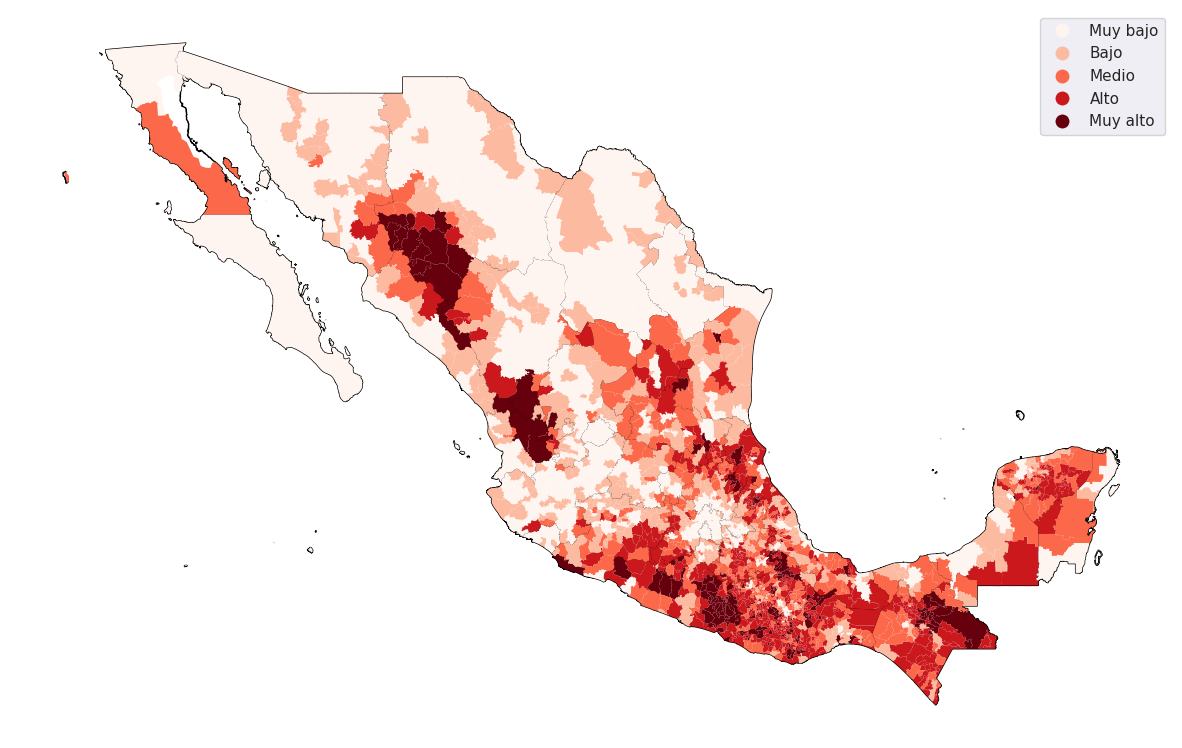

In [26]:

# datos del índice de marginación
fileindex = os.path.join(data_dir, 'IMM_2020.xls')
# especifica el tipo de variable string para los códigos de entidades y municipios
lst_str_cols = ['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN']
dict_dtypes = {x : 'str'  for x in lst_str_cols}
marg_municipal = pd.read_excel(fileindex,sheet_name='IMM_2020', dtype=dict_dtypes)
marg_municipal = marg_municipal.set_index('CVE_MUN')
# une la información cartográfica y del IM
layer_marg = layer.merge(marg_municipal, left_on='CVEGEO',right_on='CVE_MUN')
# especifica la variable GM_2020 como categórica (el IM en 5 niveles)
im_cat = pd.CategoricalIndex(layer_marg['GM_2020'], categories=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'],)

# grafica el indicador a nivel municipal
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax) 
# mapa de los municipios con su IM
layer_marg.plot(column='GM_2020', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds", 
           categories = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']) 
# Remove axis
ax.set_axis_off()
plt.show()


In [27]:
base_marg= marg_municipal[["ANALF", "SBASC", "OVSDE", "OVSEE", "OVSAE", 
                           "OVPT", "VHAC", "PL.5000", "PO2SM"]]
base_marg

ANALF      SBASC     OVSDE     OVSEE     OVSAE      OVPT  \
CVE_MUN                                                                
01001    1.644738  20.367220  0.104799  0.113169  0.378610  0.591434   
01002    3.526405  33.906364  2.650373  0.486448  0.858160  1.352430   
01003    4.491509  42.482450  0.365177  0.516760  0.800978  1.040411   
01004    3.144867  27.696745  0.712855  0.577354  0.659833  1.030989   
01005    2.380588  26.692477  0.277034  0.354957  0.860426  1.312652   
...           ...        ...       ...       ...       ...       ...   
32054    7.497894  36.678176  3.010808  0.452908  2.254246  1.137416   
32055    4.199744  44.806459  2.536486  0.551254  1.073864  0.895418   
32056    1.442438  19.436229  0.294739  0.163292  1.278559  0.484463   
32057    5.119108  31.992586  3.066130  0.500392  2.860086  1.344192   
32058    5.626223  44.226179  1.087745  0.471356  0.507614  1.667875   

              VHAC     PL.5000      PO2SM  
CVE_MUN                                    
01001    10.339530    7.523683  54.226594  
01002    22.942305   78.221049  78.565471  
01003    19.219858   51.301288  79.259777  
01004    22.716866   65.470588  81.726369  
01005    16.404575   37.164143  56.748753  
...            ...         ...        ...  
32054    21.932484  100.000000  90.877128  
32055    15.269627   56.774827  81.912592  
32056     9.340958    7.461549  57.885307  
32057    23.544577   16.788071  83.056133  
32058    17.948717  100.000000  79.013906  

[2469 rows x 9 columns]

**Identificamos el número de clústers**

Se usará el análisis de codo para identificar el número de clústeres sugeridos para la base de datos de migración con las 9 variables seleccionadas. Para ello, se utiliza como parámetro la inercia, la cual es la suma de las distancias al cuadrado de las muestras al centroide más cercano, en donde se buscan valores los más pequeños posibles (sin llegar a cero).

Como se aprecia a continuación, el número sugerido de clústeres se ubica entre 4 y 5 clústeres (después casi se aplana y decrece muy lentamente la inercia). Para K-means sugerimos usar 5 clústeres. 

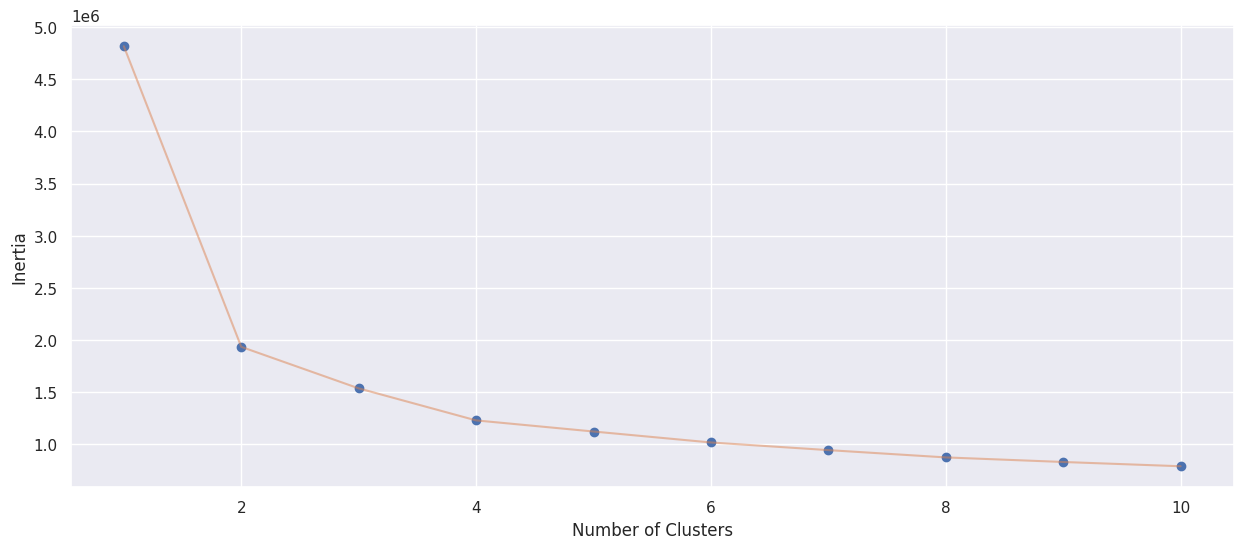

In [28]:
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(base_marg)
    inertia.append(model.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()
     

**Procedimiento K-means para la asignación de elementos a los clústeres identificados (sin estandarizar)**

Aquí usaremos la función KMeans, en donde asignamos los 5 clústeres que identificamos en el gráfico y los etiquetamos, a fin de incluirlo en el data frame de las variables, en donde a cada municipio se le asigna un cluster (0 a 4, debido a que en python el conteo comienza de cero). Cabe señalar, que los datos utilizados son sin estandarización; posteriormente compararemos con los datos estandarizados, aunque a priori, todas las variables son índices y por ende están en la misma magnitud, por lo que puede que no sea necesario realizar la estandarización.


In [29]:

#Especificamos el número de clusters para el objeto KMeans
kmeans=KMeans(n_clusters=5)

#Analizamos el clustering de los datos de la base de marg_municipal y vemos el resultado
kmeans.fit(base_marg.values)
print(kmeans.labels_)


[0 3 3 ... 0 2 1]


In [30]:
kmeans=KMeans(6)
kmeans.fit(base_marg)
indentified_clusters = kmeans.fit_predict(base_marg)
data_with_clusters = base_marg.copy()
data_with_clusters['Clusters'] = indentified_clusters 
print(data_with_clusters)

result = data_with_clusters.dtypes

print("Output:")
print(result)

            ANALF      SBASC     OVSDE     OVSEE     OVSAE      OVPT  \
CVE_MUN                                                                
01001    1.644738  20.367220  0.104799  0.113169  0.378610  0.591434   
01002    3.526405  33.906364  2.650373  0.486448  0.858160  1.352430   
01003    4.491509  42.482450  0.365177  0.516760  0.800978  1.040411   
01004    3.144867  27.696745  0.712855  0.577354  0.659833  1.030989   
01005    2.380588  26.692477  0.277034  0.354957  0.860426  1.312652   
...           ...        ...       ...       ...       ...       ...   
32054    7.497894  36.678176  3.010808  0.452908  2.254246  1.137416   
32055    4.199744  44.806459  2.536486  0.551254  1.073864  0.895418   
32056    1.442438  19.436229  0.294739  0.163292  1.278559  0.484463   
32057    5.119108  31.992586  3.066130  0.500392  2.860086  1.344192   
32058    5.626223  44.226179  1.087745  0.471356  0.507614  1.667875   

              VHAC     PL.5000      PO2SM  Clusters  
CVE_MUN  

**Gráficas de variables respecto a los clústeres creados**

Al respecto, las variables que al parecer ayudan más para definir e identificar los municipios de acuerdo a los clústeres son ANALF (% de la población analfabeta de 15 años o más) y PL.5000 (Porcentaje de población que vive en localidades menores a 5 000 habitantes), así como PO2SM (Porcentaje de población ocupada con ingresos de hasta 2 salarios mínimos). Al respecto, vemos que las interacciones en pareja de cualquiera de estas tres variables ayuda a definir los municipios en cada clúster. 



Se muestran los 36 gráficas

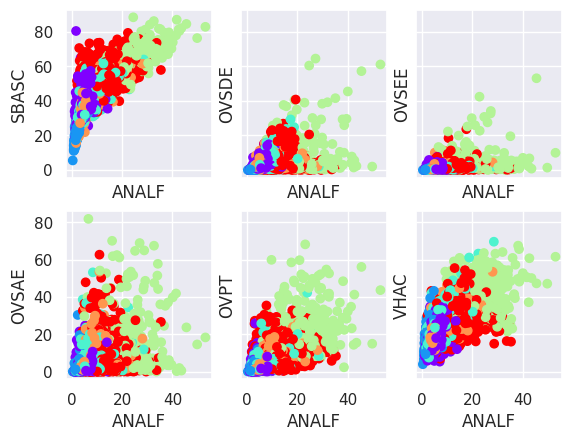

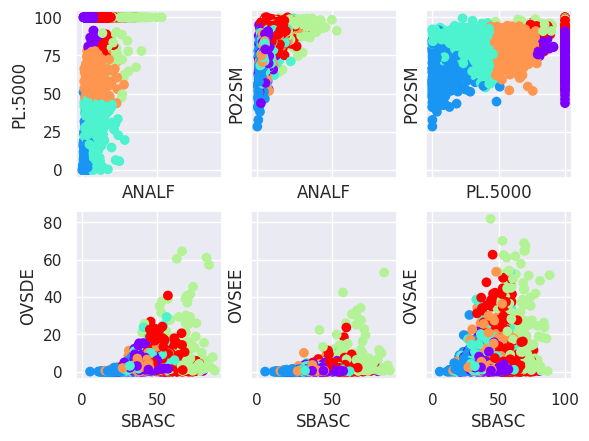

In [31]:
#Número de variables =9
#Número de gráficas = n(n-1)/2= 9*8/2= 36 gráficas

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('ANALF')
ax[0,0].set_ylabel('SBASC')

ax[0,1].set_xlabel('ANALF')
ax[0,1].set_ylabel('OVSDE')

ax[0,2].set_xlabel('ANALF')
ax[0,2].set_ylabel('OVSEE')

ax[1,0].set_xlabel('ANALF')
ax[1,0].set_ylabel('OVSAE')

ax[1,1].set_xlabel('ANALF')
ax[1,1].set_ylabel('OVPT')

ax[1,2].set_xlabel('ANALF')
ax[1,2].set_ylabel('VHAC')

ax[0,0].scatter(data_with_clusters['ANALF'],data_with_clusters['SBASC'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,1].scatter(data_with_clusters['ANALF'],data_with_clusters['OVSDE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,2].scatter(data_with_clusters['ANALF'],data_with_clusters['OVSEE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,0].scatter(data_with_clusters['ANALF'],data_with_clusters['OVSAE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,1].scatter(data_with_clusters['ANALF'],data_with_clusters['OVPT'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,2].scatter(data_with_clusters['ANALF'],data_with_clusters['VHAC'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

fig.show()

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')


ax[0,0].set_xlabel('ANALF')
ax[0,0].set_ylabel('PL:5000')

ax[0,1].set_xlabel('ANALF')
ax[0,1].set_ylabel('PO2SM')

ax[0,2].set_xlabel('PL.5000')
ax[0,2].set_ylabel('PO2SM')

ax[1,0].set_xlabel('SBASC')
ax[1,0].set_ylabel('OVSDE')

ax[1,1].set_xlabel('SBASC')
ax[1,1].set_ylabel('OVSEE')

ax[1,2].set_xlabel('SBASC')
ax[1,2].set_ylabel('OVSAE')

ax[0,0].scatter(data_with_clusters['ANALF'],data_with_clusters['PL.5000'],
             c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,1].scatter(data_with_clusters['ANALF'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,2].scatter(data_with_clusters['PL.5000'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,0].scatter(data_with_clusters['SBASC'],data_with_clusters['OVSDE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,1].scatter(data_with_clusters['SBASC'],data_with_clusters['OVSEE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,2].scatter(data_with_clusters['SBASC'],data_with_clusters['OVSAE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

fig.show() 

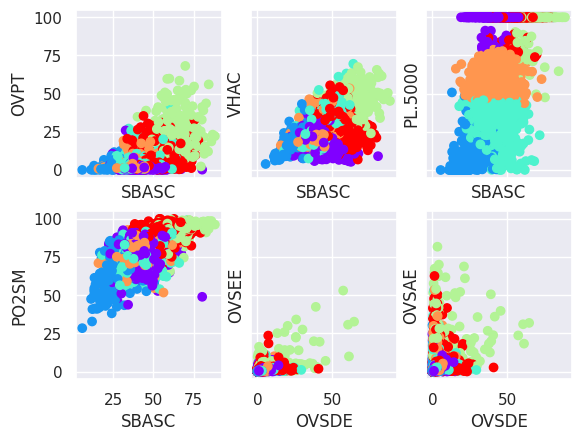

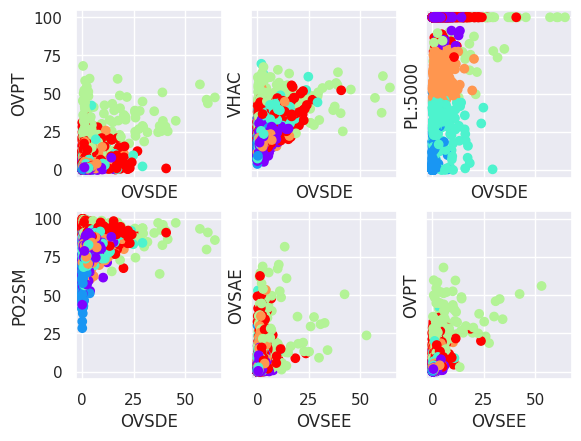

In [32]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('SBASC')
ax[0,0].set_ylabel('OVPT')

ax[0,1].set_xlabel('SBASC')
ax[0,1].set_ylabel('VHAC')

ax[0,2].set_xlabel('SBASC')
ax[0,2].set_ylabel('PL.5000')

ax[1,0].set_xlabel('SBASC')
ax[1,0].set_ylabel('PO2SM')

ax[1,1].set_xlabel('OVSDE')
ax[1,1].set_ylabel('OVSEE')

ax[1,2].set_xlabel('OVSDE')
ax[1,2].set_ylabel('OVSAE')


ax[0,0].scatter(data_with_clusters['SBASC'],data_with_clusters['OVPT'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,1].scatter(data_with_clusters['SBASC'],data_with_clusters['VHAC'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,2].scatter(data_with_clusters['SBASC'],data_with_clusters['PL.5000'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,0].scatter(data_with_clusters['SBASC'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,1].scatter(data_with_clusters['OVSDE'],data_with_clusters['OVSEE'],
             c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,2].scatter(data_with_clusters['OVSDE'],data_with_clusters['OVSAE'],
            c=data_with_clusters['Clusters'],cmap='rainbow')


fig.show()

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('OVSDE')
ax[0,0].set_ylabel('OVPT')

ax[0,1].set_xlabel('OVSDE')
ax[0,1].set_ylabel('VHAC')

ax[0,2].set_xlabel('OVSDE')
ax[0,2].set_ylabel('PL:5000')

ax[1,0].set_xlabel('OVSDE')
ax[1,0].set_ylabel('PO2SM')

ax[1,1].set_xlabel('OVSEE')
ax[1,1].set_ylabel('OVSAE')

ax[1,2].set_xlabel('OVSEE')
ax[1,2].set_ylabel('OVPT')

ax[0,0].scatter(data_with_clusters['OVSDE'],data_with_clusters['OVPT'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,1].scatter(data_with_clusters['OVSDE'],data_with_clusters['VHAC'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,2].scatter(data_with_clusters['OVSDE'],data_with_clusters['PL.5000'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,0].scatter(data_with_clusters['OVSDE'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,1].scatter(data_with_clusters['OVSEE'],data_with_clusters['OVSAE'],
             c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,2].scatter(data_with_clusters['OVSEE'],data_with_clusters['OVPT'],
            c=data_with_clusters['Clusters'],cmap='rainbow')


fig.show()

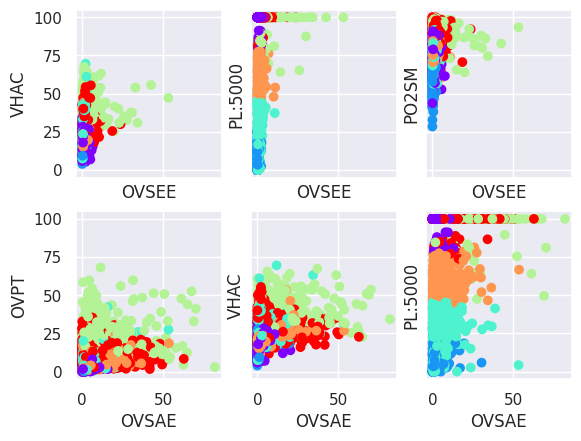

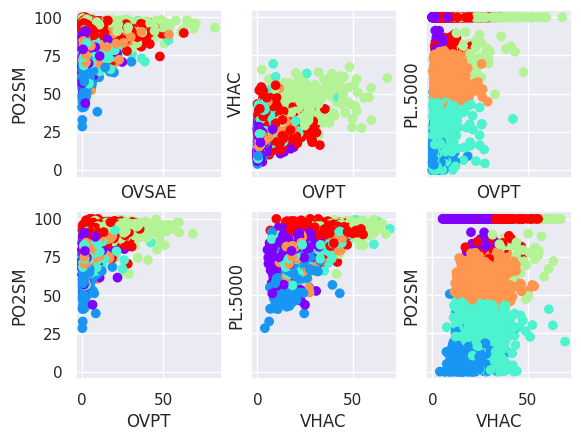

In [33]:

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('OVSEE')
ax[0,0].set_ylabel('VHAC')

ax[0,1].set_xlabel('OVSEE')
ax[0,1].set_ylabel('PL:5000')

ax[0,2].set_xlabel('OVSEE')
ax[0,2].set_ylabel('PO2SM')

ax[1,0].set_xlabel('OVSAE')
ax[1,0].set_ylabel('OVPT')

ax[1,1].set_xlabel('OVSAE')
ax[1,1].set_ylabel('VHAC')

ax[1,2].set_xlabel('OVSAE')
ax[1,2].set_ylabel('PL:5000')

ax[0,0].scatter(data_with_clusters['OVSEE'],data_with_clusters['VHAC'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,1].scatter(data_with_clusters['OVSEE'],data_with_clusters['PL.5000'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,2].scatter(data_with_clusters['OVSEE'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,0].scatter(data_with_clusters['OVSAE'],data_with_clusters['OVPT'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,1].scatter(data_with_clusters['OVSAE'],data_with_clusters['VHAC'],
             c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,2].scatter(data_with_clusters['OVSAE'],data_with_clusters['PL.5000'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

fig.show()


fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('OVSAE')
ax[0,0].set_ylabel('PO2SM')

ax[0,1].set_xlabel('OVPT')
ax[0,1].set_ylabel('VHAC')

ax[0,2].set_xlabel('OVPT')
ax[0,2].set_ylabel('PL.5000')

ax[1,0].set_xlabel('OVPT')
ax[1,0].set_ylabel('PO2SM')

ax[1,1].set_xlabel('VHAC')
ax[1,1].set_ylabel('PL:5000')

ax[1,2].set_xlabel('VHAC')
ax[1,2].set_ylabel('PO2SM')

ax[0,0].scatter(data_with_clusters['OVSAE'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,1].scatter(data_with_clusters['OVPT'],data_with_clusters['VHAC'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[0,2].scatter(data_with_clusters['OVPT'],data_with_clusters['PL.5000'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,0].scatter(data_with_clusters['OVPT'],data_with_clusters['PO2SM'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,2].scatter(data_with_clusters['VHAC'],data_with_clusters['PL.5000'],
            c=data_with_clusters['Clusters'],cmap='rainbow')

ax[1,1].scatter(data_with_clusters['VHAC'],data_with_clusters['PO2SM'],
             c=data_with_clusters['Clusters'],cmap='rainbow')



fig.show()

**Procedimiento K-means para la asignación de elementos a los clústeres identificados (datos estandarizarados)**

A continuación hacemos el mismo procedimiento de K-means pero ahora con los datos estandarizados, de igual forma, usaremos el gráfico de codo para identificar el número de clústeres sugeridos. Al respecto, el gráfico de codo sugiere entre 5 y 6 clústeres. aunque para este ejercicio usaremos 5, a fin de comparar los resultados con los datos no estandarizados. 

Las bases de datos con datos estandarizados se denomina "data_with_clusters_est", mientras que la base de datos sin estandarizar se reconoce con el nombre de "data_with_clusters" también en identified_clusters.

In [34]:
import pandas as pd
#from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import scale

In [35]:
base_marg
labelList=list(base_marg.iloc[:, 0]) #guardamos los nombres de los estados

Se estandariza la base de datos de marginación:

In [36]:
datos_scaled = scale(X=base_marg, axis=0, with_mean=True, with_std=True) 
datos_scaled = pd.DataFrame(datos_scaled, columns=base_marg.columns, index=labelList)
datos_scaled.head(8)

ANALF     SBASC     OVSDE     OVSEE     OVSAE      OVPT  \
1.644738 -1.116304 -1.823180 -0.577729 -0.501200 -0.620885 -0.824341   
3.526405 -0.869757 -0.854629 -0.096363 -0.366374 -0.569009 -0.739520   
4.491509 -0.743304 -0.241121 -0.528492 -0.355425 -0.575194 -0.774297   
3.144867 -0.919748 -1.298848 -0.462746 -0.333540 -0.590463 -0.775348   
2.380588 -1.019889 -1.370690 -0.545160 -0.413867 -0.568764 -0.743953   
2.732339 -0.973800 -1.439952 -0.495180 -0.388393 -0.548823 -0.811612   
3.445917 -0.880303 -1.341942 -0.414901 -0.360995 -0.550720 -0.745067   
2.439773 -1.012134 -1.247112 -0.199088 -0.208865 -0.476992 -0.794448   

              VHAC   PL.5000     PO2SM  
1.644738 -1.533083 -1.769023 -2.360259  
3.526405 -0.342389  0.235974 -0.302534  
4.491509 -0.694081 -0.527478 -0.243834  
3.144867 -0.363688 -0.125633 -0.035296  
2.380588 -0.960065 -0.928411 -2.147024  
2.732339 -0.707677 -1.053185 -1.505645  
3.445917 -0.528210 -0.726455 -0.464986  
2.439773 -0.471783 -0.811110 -0.569233

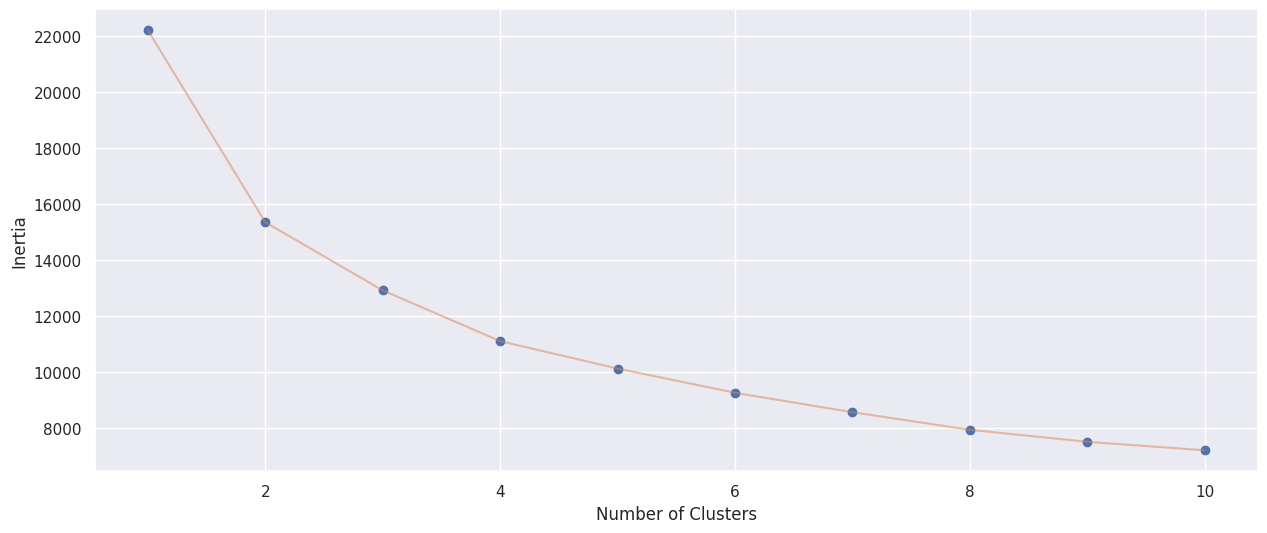

In [37]:
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(datos_scaled)
    inertia.append(model.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()
     

In [38]:
kmeans=KMeans(5)
kmeans.fit(datos_scaled)
indentified_clusters_est = kmeans.fit_predict(datos_scaled)
data_with_clusters_est = base_marg.copy()
data_with_clusters_est['Clusters'] = indentified_clusters_est 
print(data_with_clusters_est)

result = data_with_clusters_est.dtypes

print("Output:")
print(result)

            ANALF      SBASC     OVSDE     OVSEE     OVSAE      OVPT  \
CVE_MUN                                                                
01001    1.644738  20.367220  0.104799  0.113169  0.378610  0.591434   
01002    3.526405  33.906364  2.650373  0.486448  0.858160  1.352430   
01003    4.491509  42.482450  0.365177  0.516760  0.800978  1.040411   
01004    3.144867  27.696745  0.712855  0.577354  0.659833  1.030989   
01005    2.380588  26.692477  0.277034  0.354957  0.860426  1.312652   
...           ...        ...       ...       ...       ...       ...   
32054    7.497894  36.678176  3.010808  0.452908  2.254246  1.137416   
32055    4.199744  44.806459  2.536486  0.551254  1.073864  0.895418   
32056    1.442438  19.436229  0.294739  0.163292  1.278559  0.484463   
32057    5.119108  31.992586  3.066130  0.500392  2.860086  1.344192   
32058    5.626223  44.226179  1.087745  0.471356  0.507614  1.667875   

              VHAC     PL.5000      PO2SM  Clusters  
CVE_MUN  

**Gráficas con pares de variables con los clústeres identificados**

En estas gráficas se aprecia que los elementos se traslapan más y no se identifican bien la relación entre las variables y los clústeres asignados. No obstante, las variables que permiten ver la relación entre los grupos son PO2SM (de igual forma que en los datos sin estandarizar); OVSAE (Porcentaje de ocupantes en viviendas particulares habitadas sin agua entubada) y SBASC (Porcentaje de población de 15 años o más sin educación básica).

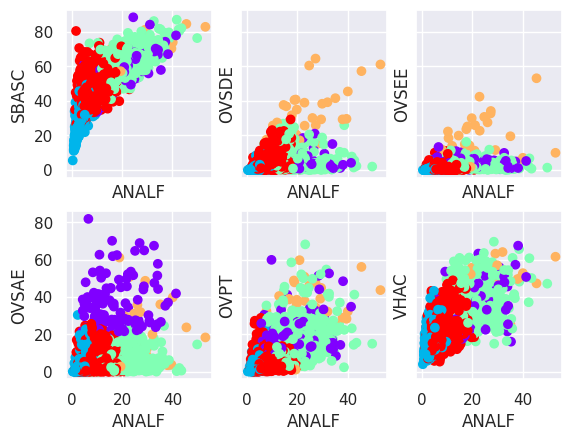

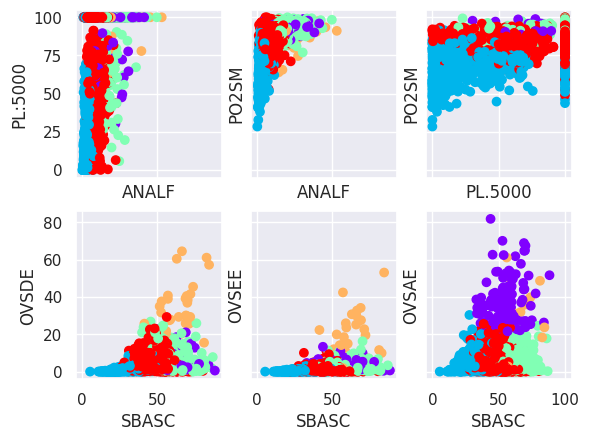

In [39]:
#Número de variables =9
#Número de gráficas = n(n-1)/2= 9*8/2= 36 gráficas
#Datos estandarizados

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('ANALF')
ax[0,0].set_ylabel('SBASC')

ax[0,1].set_xlabel('ANALF')
ax[0,1].set_ylabel('OVSDE')

ax[0,2].set_xlabel('ANALF')
ax[0,2].set_ylabel('OVSEE')

ax[1,0].set_xlabel('ANALF')
ax[1,0].set_ylabel('OVSAE')

ax[1,1].set_xlabel('ANALF')
ax[1,1].set_ylabel('OVPT')

ax[1,2].set_xlabel('ANALF')
ax[1,2].set_ylabel('VHAC')

ax[0,0].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['SBASC'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,1].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['OVSDE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,2].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['OVSEE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,0].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['OVSAE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,1].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['OVPT'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,2].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['VHAC'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

fig.show()

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')


ax[0,0].set_xlabel('ANALF')
ax[0,0].set_ylabel('PL:5000')

ax[0,1].set_xlabel('ANALF')
ax[0,1].set_ylabel('PO2SM')

ax[0,2].set_xlabel('PL.5000')
ax[0,2].set_ylabel('PO2SM')

ax[1,0].set_xlabel('SBASC')
ax[1,0].set_ylabel('OVSDE')

ax[1,1].set_xlabel('SBASC')
ax[1,1].set_ylabel('OVSEE')

ax[1,2].set_xlabel('SBASC')
ax[1,2].set_ylabel('OVSAE')

ax[0,0].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['PL.5000'],
             c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,1].scatter( data_with_clusters_est['ANALF'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,2].scatter( data_with_clusters_est['PL.5000'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,0].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['OVSDE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,1].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['OVSEE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,2].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['OVSAE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

fig.show() 

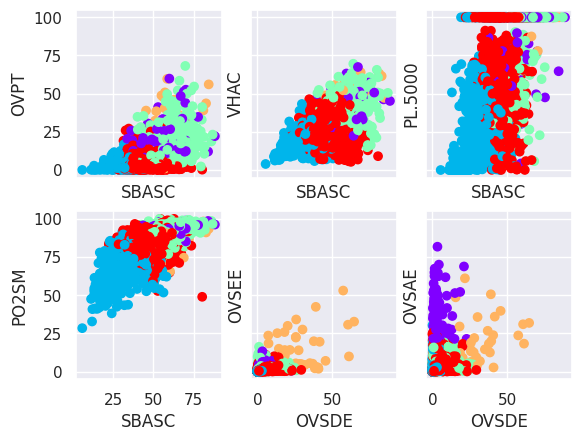

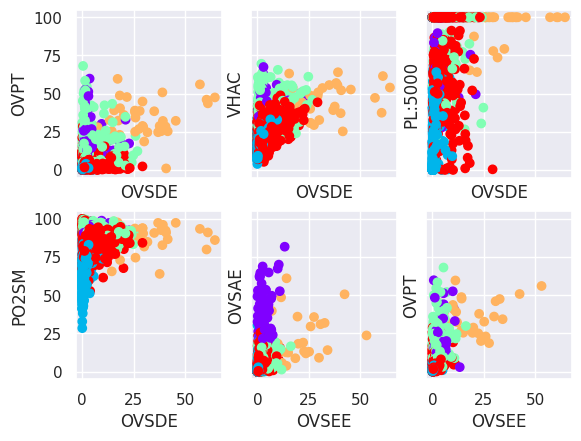

In [40]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('SBASC')
ax[0,0].set_ylabel('OVPT')

ax[0,1].set_xlabel('SBASC')
ax[0,1].set_ylabel('VHAC')

ax[0,2].set_xlabel('SBASC')
ax[0,2].set_ylabel('PL.5000')

ax[1,0].set_xlabel('SBASC')
ax[1,0].set_ylabel('PO2SM')

ax[1,1].set_xlabel('OVSDE')
ax[1,1].set_ylabel('OVSEE')

ax[1,2].set_xlabel('OVSDE')
ax[1,2].set_ylabel('OVSAE')


ax[0,0].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['OVPT'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,1].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['VHAC'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,2].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['PL.5000'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,0].scatter( data_with_clusters_est['SBASC'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,1].scatter( data_with_clusters_est['OVSDE'], data_with_clusters_est['OVSEE'],
             c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,2].scatter( data_with_clusters_est['OVSDE'], data_with_clusters_est['OVSAE'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')


fig.show()

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('OVSDE')
ax[0,0].set_ylabel('OVPT')

ax[0,1].set_xlabel('OVSDE')
ax[0,1].set_ylabel('VHAC')

ax[0,2].set_xlabel('OVSDE')
ax[0,2].set_ylabel('PL:5000')

ax[1,0].set_xlabel('OVSDE')
ax[1,0].set_ylabel('PO2SM')

ax[1,1].set_xlabel('OVSEE')
ax[1,1].set_ylabel('OVSAE')

ax[1,2].set_xlabel('OVSEE')
ax[1,2].set_ylabel('OVPT')

ax[0,0].scatter( data_with_clusters_est['OVSDE'], data_with_clusters_est['OVPT'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,1].scatter( data_with_clusters_est['OVSDE'], data_with_clusters_est['VHAC'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,2].scatter( data_with_clusters_est['OVSDE'], data_with_clusters_est['PL.5000'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,0].scatter( data_with_clusters_est['OVSDE'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,1].scatter( data_with_clusters_est['OVSEE'], data_with_clusters_est['OVSAE'],
             c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,2].scatter( data_with_clusters_est['OVSEE'], data_with_clusters_est['OVPT'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')


fig.show()

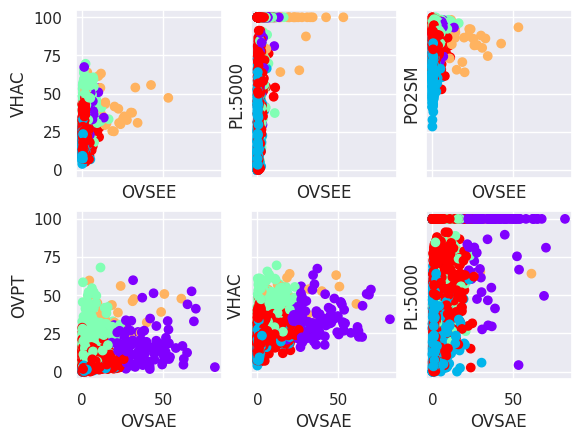

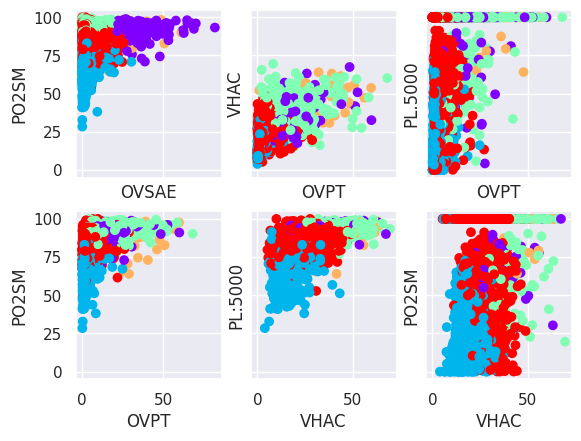

In [41]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('OVSEE')
ax[0,0].set_ylabel('VHAC')

ax[0,1].set_xlabel('OVSEE')
ax[0,1].set_ylabel('PL:5000')

ax[0,2].set_xlabel('OVSEE')
ax[0,2].set_ylabel('PO2SM')

ax[1,0].set_xlabel('OVSAE')
ax[1,0].set_ylabel('OVPT')

ax[1,1].set_xlabel('OVSAE')
ax[1,1].set_ylabel('VHAC')

ax[1,2].set_xlabel('OVSAE')
ax[1,2].set_ylabel('PL:5000')

ax[0,0].scatter( data_with_clusters_est['OVSEE'], data_with_clusters_est['VHAC'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,1].scatter( data_with_clusters_est['OVSEE'], data_with_clusters_est['PL.5000'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,2].scatter( data_with_clusters_est['OVSEE'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,0].scatter( data_with_clusters_est['OVSAE'], data_with_clusters_est['OVPT'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,1].scatter( data_with_clusters_est['OVSAE'], data_with_clusters_est['VHAC'],
             c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,2].scatter( data_with_clusters_est['OVSAE'], data_with_clusters_est['PL.5000'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

fig.show()


fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

ax[0,0].set_xlabel('OVSAE')
ax[0,0].set_ylabel('PO2SM')

ax[0,1].set_xlabel('OVPT')
ax[0,1].set_ylabel('VHAC')

ax[0,2].set_xlabel('OVPT')
ax[0,2].set_ylabel('PL.5000')

ax[1,0].set_xlabel('OVPT')
ax[1,0].set_ylabel('PO2SM')

ax[1,1].set_xlabel('VHAC')
ax[1,1].set_ylabel('PL:5000')

ax[1,2].set_xlabel('VHAC')
ax[1,2].set_ylabel('PO2SM')

ax[0,0].scatter( data_with_clusters_est['OVSAE'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,1].scatter( data_with_clusters_est['OVPT'], data_with_clusters_est['VHAC'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[0,2].scatter( data_with_clusters_est['OVPT'], data_with_clusters_est['PL.5000'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,0].scatter( data_with_clusters_est['OVPT'], data_with_clusters_est['PO2SM'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,2].scatter( data_with_clusters_est['VHAC'], data_with_clusters_est['PL.5000'],
            c= data_with_clusters_est['Clusters'],cmap='rainbow')

ax[1,1].scatter( data_with_clusters_est['VHAC'], data_with_clusters_est['PO2SM'],
             c= data_with_clusters_est['Clusters'],cmap='rainbow')



fig.show()

**Mapas de la república con la asiganción de los municipios a los 5 clústeres identificados**

Finalmente, analizamos los clústeres realizados entre la asiganción elaborada con los datos sin estandarizar, los datos estandarizados y los comparamos con la asignación hecha por la CONAPO (mapa que se incluye al inicio del ejercicio).

Al respecto, aunque los colores cambian (debido a que en la asignación de clústeres no se etiquetan por marginación del municipio como en la base de CONAPO), se aprecia que el mapa con los datos sin estandarizar se asemeja más al mapa con la asignación de CONAPO. Por ejemplo, zonas de marginación muy alta como la zona al sur de Chihuahua y parte de Durango;  la región en donde colindan Jalisco y Zacatecas, zonas de Guerrero y Oaxaca y el sur de Chiapas; zonas de marginacióm muy bajas de Baja California Sur y el norte de Baja California. Campeche y regiones de Nuevo León.

Por otro lado, los datos estandarizados arrojan resultados muy similares, en donde no se aprecian bien similitudes con la base original. Asimismo, como habíamos sugerido anteriormente, los datos son de la misma magnitud, debido a que son porcentajes, por lo que no se sugiere su estandarización.

En conclusión, el procedimiento K-means con 5 clústeres sin estandarizar arroja resultados similares a los identificados por CONAPO.

Con datos sin estandarizar

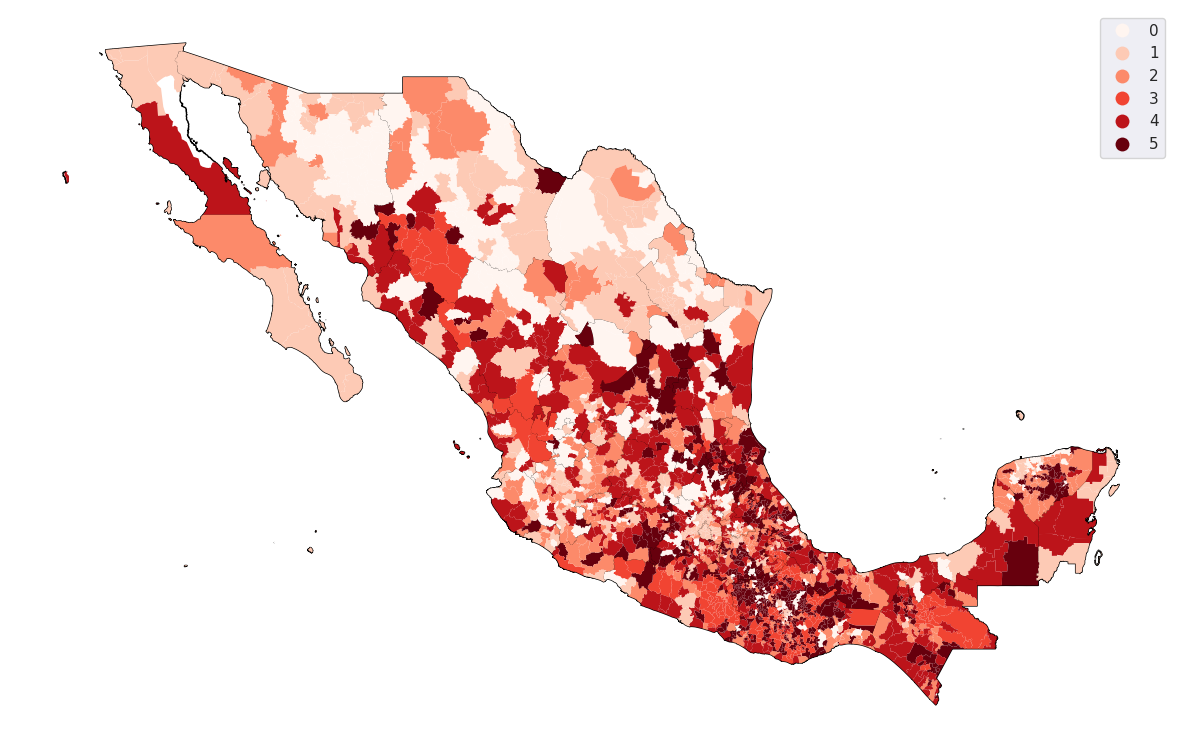

In [42]:
#generamos una copia de los datos originales para graficar el mapa con los clusters generados
marg_municipal_cop= marg_municipal
#guardamos los clusters generados con los datos originales
y = np.array(data_with_clusters["Clusters"])
#guardamos los clusters generados con los datos estandarizados
y_est = np.array(data_with_clusters_est["Clusters"])
#montamos los cluster a los municipios
marg_municipal_cop['Clusters'] = y 
marg_municipal_cop['Clusters_estand'] = y_est

# une la información cartográfica y del IM
layer_marg_2 = layer.merge(marg_municipal_cop, left_on='CVEGEO',right_on='CVE_MUN')
layer_marg_2 

# especifica la variable GM_2020 como categórica (el IM en 5 niveles)
im_cat_2 = pd.CategoricalIndex(layer_marg_2['Clusters'], categories=[0, 1, 2, 3, 4, 5],)

# grafica el indicador a nivel municipal
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax) 
# mapa de los municipios con su IM
layer_marg_2.plot(column='Clusters', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds",categories = [0, 1, 2, 3, 4, 5]) 
# Remove axis
ax.set_axis_off()
plt.show()

Con datos estandarizados

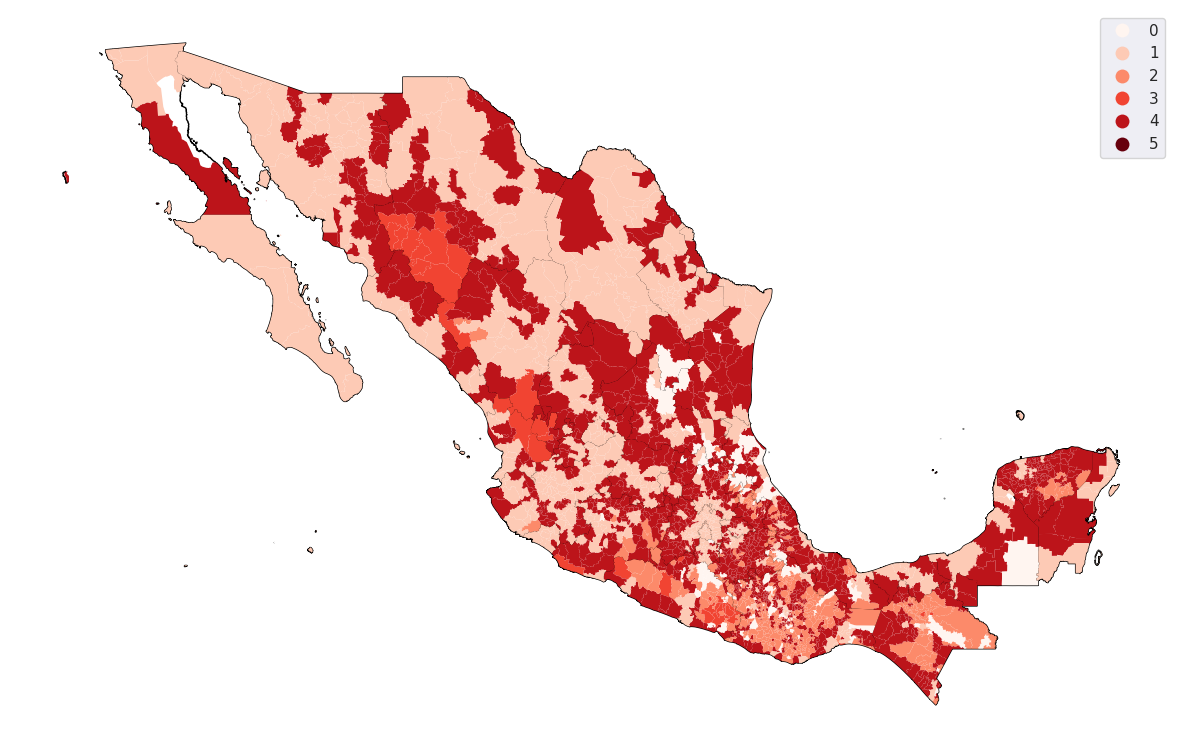

In [43]:
# especifica la variable GM_2020 como categórica (el IM en 5 niveles)
im_cat_2 = pd.CategoricalIndex(layer_marg_2['Clusters_estand'], categories=[0, 1, 2, 3, 4, 5],)

# grafica el indicador a nivel municipal
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax) 
# mapa de los municipios con su IM
layer_marg_2.plot(column='Clusters_estand', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds",categories = [0, 1, 2, 3, 4, 5]) 
# Remove axis
ax.set_axis_off()
plt.show()

## b)

Para este inciso, primero obtendremos los componentes principales de esta base de 2,469 municipios respecto a las 9 variables de marginación: "ANALF", "SBASC", "OVSDE", "OVSEE", "OVSAE", "OVPT", "VHAC", "PL.5000" y "PO2SM". Para ello, primero haremos un análisis PCA y posteriormente un análisis kernel PCA. Finalmente se graficarán los principales componentes identificados (buscamos que los componentes en suma contengan al menos 80% de la varianza total), con base en los clústeres identificados. De igual forma, se recuerda que  la base de CONAPO sugiere 5 clústeres para analizar la marginación (con base en el indicador de Marginación 2020), los cuales son: Muy bajo; Bajo; Medio: Alto y; Muy Alto.

In [44]:
mun = pd.read_excel(fileindex,sheet_name='IMM_2020', dtype=dict_dtypes)
labelList=list(mun['NOM_MUN']) #guardamos los nombres de los municipios
CVE_MUN=list(mun['CVE_MUN']) #guardamos las claves de los municipios
GM_2020=list(mun['GM_2020']) #guardamos los grados de marginación


**Identificación de los componentes principales (datos sin estandarizar)**

Usamos la función PCA de la librería sklearn.decompostion, a fin de identificar los componentes principales. Lo hacemos con los datos sin estandarizar. Al respecto, se observa que solamente dos componentes acumulan el 86.5% de la varianza total, por tal motivo se recomiendan dos componentes principales. 

Por tal motivo, nos quedamos con $p=2$ dimensiones, correspondientes a los dos principales eigenvectors de acuerdo a la varianza acumlada que explican en su conjunto. Aunado a que 2 dimensiones explican gran parte de la varianza, también estamos simplificando el análisis mediante el uso de menos dimensiones )en vez de 6 que explican el 91% de la varianza total).

In [45]:
mun = pd.read_excel(fileindex,sheet_name='IMM_2020', dtype=dict_dtypes)
labelList=list(mun['NOM_MUN'])

import numpy as np
from sklearn.decomposition import PCA

#usamos los datos estandarizados anteriormente "datos_scaled"

#X = datos_scaled
X=base_marg
pca = PCA(n_components=8)

pca.fit(X)
print("Varianza explicada:")
print(pca.explained_variance_ratio_)
print("Valores singulares:")
print(pca.singular_values_)

#Varianza acumulada
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])
print("Varianza acumulada:")
print(cum_explained_var)


Varianza explicada:
[0.73226449 0.13285275 0.04109183 0.03020301 0.02638881 0.01652781
 0.01152683 0.00715334]
Valores singulares:
[1877.86530936  799.86320839  444.84444505  381.3779353   356.48426955
  282.12271748  235.60550807  185.60296524]
Varianza acumulada:
[0.7322644948786744, 0.8651172424408994, 0.906209068622963, 0.9364120785500578, 0.9628008906178432, 0.9793286969687586, 0.990855529342242, 0.9980088701977783]


**Predicción de los componentes principales (datos sin estandarizar)**

In [46]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

#Hacemos la predicción


In [47]:
comp_prin_marg = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])
comp_prin_marg.index=labelList
comp_prin_marg

principal component 1  principal component 2
Aguascalientes                     73.944550             -13.488974
Asientos                           -1.534813             -17.363368
Calvillo                           21.213990              -4.939926
Cosío                              11.325256             -14.915985
Jesús María                        43.647817             -17.111884
...                                      ...                    ...
Villa Hidalgo                     -25.309367             -18.687812
Villanueva                         15.395373              -6.721556
Zacatecas                          73.550928             -12.927417
Trancoso                           54.089675               7.515312
Santa María de la Paz             -24.012125             -22.386020

[2469 rows x 2 columns]

**Identificamos el número de clústeres (PCA de los datos sin estandarizar)**

Para el PCA, analizando la inercia del gráfico de codo, se sugiere utilzar 4 clústeres.

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

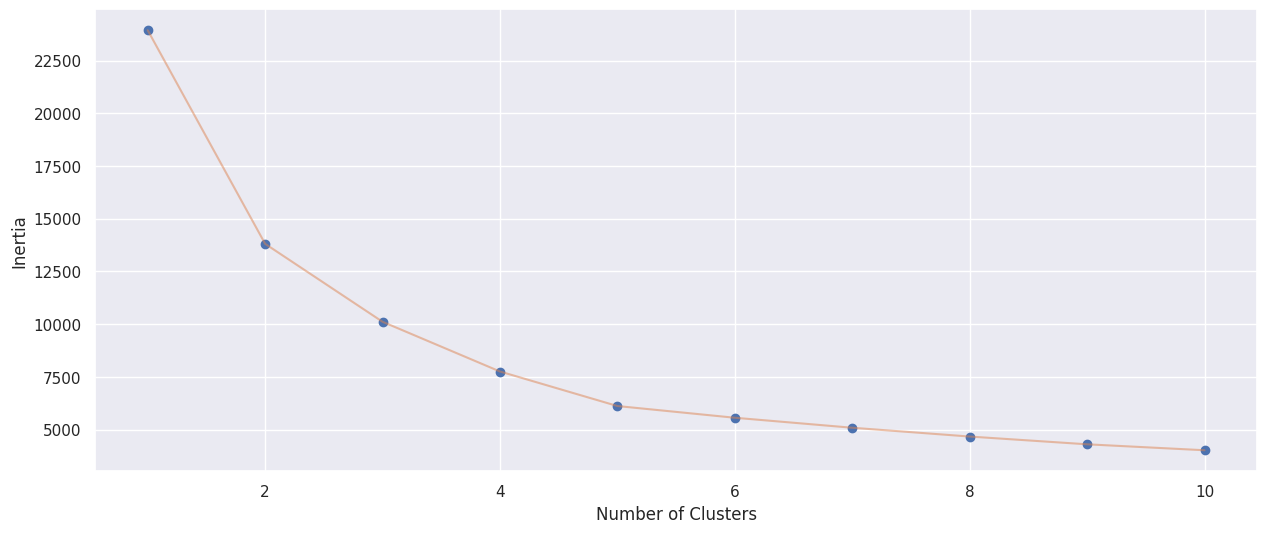

In [92]:
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(comp_prin_marg)
    inertia.append(model.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')


In [93]:
kmeans=KMeans(4)
kmeans.fit(datos_scaled)
indentified_clusters_pca = kmeans.fit_predict(comp_prin_marg)
data_with_clusters_pca = comp_prin_marg.copy()
data_with_clusters_pca['Clusters'] = indentified_clusters_pca
data_with_clusters_pca_sinest=data_with_clusters_pca
print(data_with_clusters_pca)

result = data_with_clusters_pca.dtypes

print("Output:")


      principal component 1  principal component 2  principal component 3  \
0                 -3.847822               1.199462              -0.410835   
1                 -1.391098              -0.135314               0.569230   
2                 -1.542479              -0.322899               0.166443   
3                 -1.700064              -0.154769               0.219273   
4                 -3.021976               0.804573              -0.138147   
...                     ...                    ...                    ...   
2464              -0.529294              -0.760038               0.827796   
2465              -1.398222              -0.283976               0.553057   
2466              -3.774185               1.164255              -0.415447   
2467              -1.642171               0.429154              -0.346940   
2468              -1.029337              -0.769002               0.888414   

      principal component 4  label  Clusters  
0                 -0.214396 

In [51]:
data_with_clusters_pca["Clusters"]

0       1
1       0
2       3
3       3
4       1
       ..
2464    0
2465    3
2466    1
2467    1
2468    0
Name: Clusters, Length: 2469, dtype: int32

In [52]:
y = np.array(data_with_clusters_pca["Clusters"])

comp_prin_marg['label'] = y

comp_prin_marg
kmeans=kmeans.fit(comp_prin_marg)

**Gráfica de los componentes principales (datos sin estandarizar) por clúster**

A continuación se muestra el gráfico de PCA por clúster identificado mediante K-means para los dos componentes principales sugeridos a la base de datos sin estandarizar. Al respecto, se aprecia que:
- 1er componente: los datos se agrupan de forma definida de izquierda a derecha, en donde en la parte más a la izquierda se localizan aquellos elementos pertenecientes a los grupos "0" y "2" (colores rojo y azul respectivamente), mientras que de izquiera a derecha continúan el grupo 3 y el grupo 4.
- 2o componente: los elementos pertenecientes al grupo rojo se encuentran en el cuadrante inferior de la gráfica, mientras que el resto se localiza de la parte media a la parte superior de la gráfica. 

<Figure size 640x480 with 0 Axes>

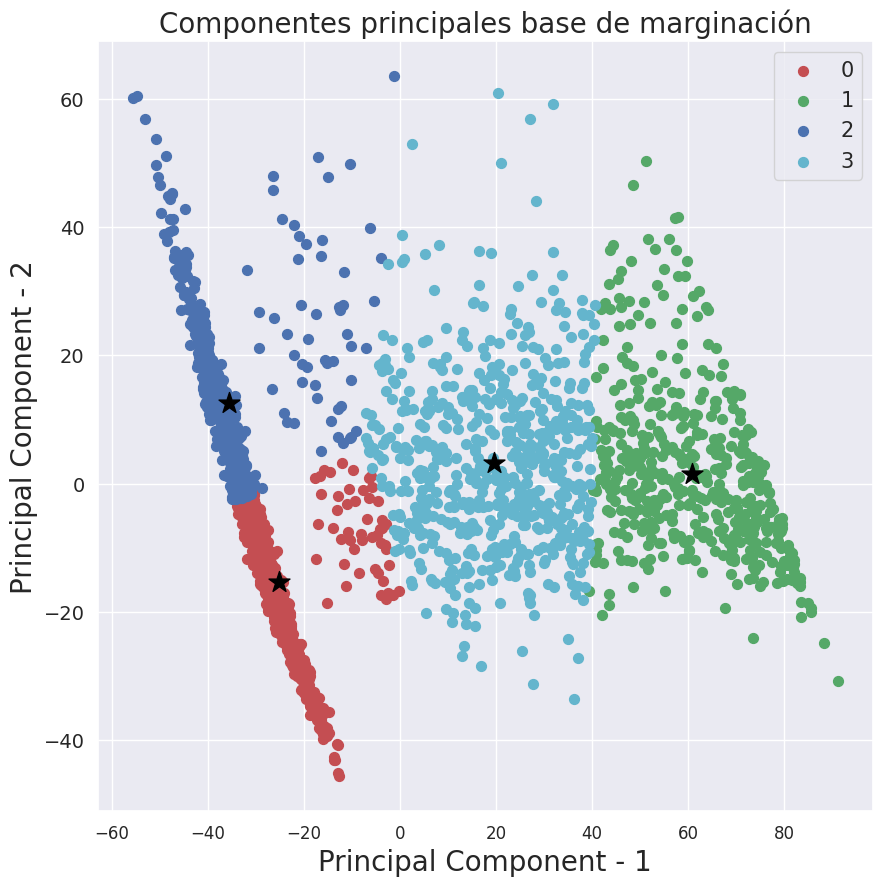

In [53]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Componentes principales base de marginación",fontsize=20)
targets = [0, 1, 2, 3]
colors = ['r', 'g', 'b', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = comp_prin_marg['label'] == target
    plt.scatter(comp_prin_marg.loc[indicesToKeep, 'principal component 1']
               , comp_prin_marg.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
    
plt.legend(targets,prop={'size': 15})

**Predicción de los PCA para los datos sin estandarizar**

Para esta sección analizamos las cargas de cada componente principal. Al respecto, se aprecia que la variable que es explicada en mayor medida en este componente es la de PL.5000 (Porcentaje de población que vive en localidades menores a 5 000 habitantes). Ya en el inciso a en los datos sin estandarizar se apreciaba que era una de las variables que ayudaba a identificar y clasificar a los elementos en los clústeres. Por otra parte, en el componente dos, hay una distribución entre todas las variables, por lo que nos centraremos en las variables que tienen menos importancia, como son OVSDE (Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado) y OVSEE (Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica).

De igual forma, se aprecia como la variable PL.5000 al parecer es la variable más importante para la asignación de los clústeres de acuerdo a la marginación de los municipios. Esto tiene sentido, ya que las localidades más pequeñas, generalmente están más alejadas de las ciudades importantes que tienen accesos a servicios básicos como acceso al agua, salud, educación, así como oportunidades de empleo (sobre todo mejor remunerados).

Asimismo, comparamos esta variable con los clústeres que asignamos y con los clústeres originales, así como el índice de marginación y de igual forma se aprecia una relación entre la variable PL.5000 y el grado de marginación.

In [54]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

#Hacemos la predicción

loadings = pca.components_

In [55]:
# Number of features before PCA
n_features = pca.n_features_
 
# Feature names before PCA
#feature_names = marg_municipal.feature_names
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
#loadings_df['feature_names'] = feature_names
#loadings_df = loadings_df.set_index('feature_names')
loadings_df = loadings_df.rename(index={0: 'ANALF', 1: 'SBASC', 2: 'OVSDE', 3: 'OVSEE', 4: 'OVSAE',
                                   5: 'OVPT', 6: 'VHAC', 7: 'PL.5000', 8: 'PO2SM'})
loadings_df

PC1       PC2
ANALF   -0.114924  0.310918
SBASC   -0.262747  0.464723
OVSDE   -0.034994  0.091863
OVSEE   -0.020467  0.051742
OVSAE   -0.061542  0.229474
OVPT    -0.104893  0.345811
VHAC    -0.108656  0.483676
PL.5000 -0.919031 -0.372062
PO2SM   -0.211892  0.362808

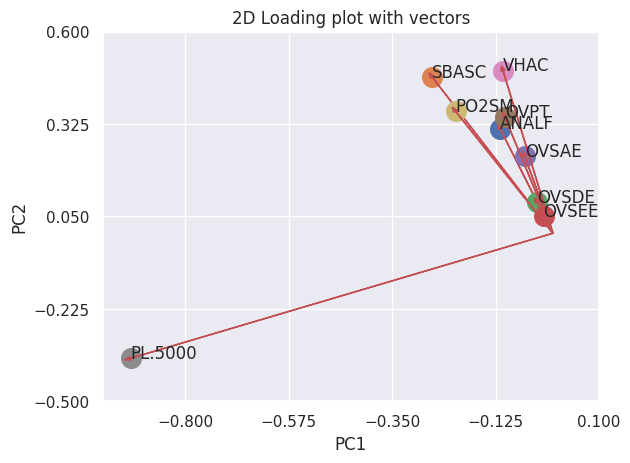

In [56]:
# Plot the loadings on a scatterplot
variables=["ANALF", "SBASC", "OVSDE", "OVSEE", "OVSAE", "OVPT", "VHAC", "PL.5000", "PO2SM"]

# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
for i, varnames in enumerate(variables):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.1, num=5)
yticks = np.linspace(-0.5, 0.6, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()


In [94]:
y_est

array([4, 1, 1, ..., 4, 4, 1], dtype=int32)

**Identificación de los componentes principales (datos estandarizados)**

Para los datos sin estandarizar se recomienda utilizar 4 componentes principales, los cuales explican en su conjunto el 81% de la varianza total. 

In [95]:
mun = pd.read_excel(fileindex,sheet_name='IMM_2020', dtype=dict_dtypes)
labelList=list(mun['NOM_MUN'])

import numpy as np
from sklearn.decomposition import PCA

#usamos los datos estandarizados anteriormente "datos_scaled"

X_est = datos_scaled
#X=base_marg
pca_est = PCA(n_components=8)

pca.fit(X_est)
print("Varianza explicada:")
print(pca.explained_variance_ratio_)
print("Valores singulares:")
print(pca.singular_values_)

#Varianza acumulada
cum_explained_var_est = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])
print("Varianza acumulada:")
print(cum_explained_var_est)


Varianza explicada:
[0.49168927 0.14280608 0.09338753 0.08269173]
Valores singulares:
[104.52668191  56.33199776  45.55397155  42.86598849]
Varianza acumulada:
[]


In [96]:
pca_est = PCA(n_components=4)
pca.fit(X_est)
X_pca_est = pca.transform(X)

In [97]:
comp_prin_marg_est = pd.DataFrame(data = X_pca_est
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
comp_prin_marg_est

principal component 1  principal component 2  principal component 3  \
0                 -3.847822               1.199462              -0.410835   
1                 -1.391098              -0.135314               0.569230   
2                 -1.542479              -0.322899               0.166443   
3                 -1.700064              -0.154769               0.219273   
4                 -3.021976               0.804573              -0.138147   
...                     ...                    ...                    ...   
2464              -0.529294              -0.760038               0.827796   
2465              -1.398222              -0.283976               0.553057   
2466              -3.774185               1.164255              -0.415447   
2467              -1.642171               0.429154              -0.346940   
2468              -1.029337              -0.769002               0.888414   

      principal component 4  
0                 -0.214396  
1                  0.133093  
2                 -0.004166  
3                  0.025750  
4                 -0.061204  
...                     ...  
2464               0.487256  
2465               0.224962  
2466              -0.102902  
2467              -0.676853  
2468               0.661817  

[2469 rows x 4 columns]

**Identificamos el número de clústeres (datos estandarizados)**

De igual forma, el gráfico de codo sugiere que son entre 4 y 6 los clústeres que se deben formar. Seleccionaremos 5.

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

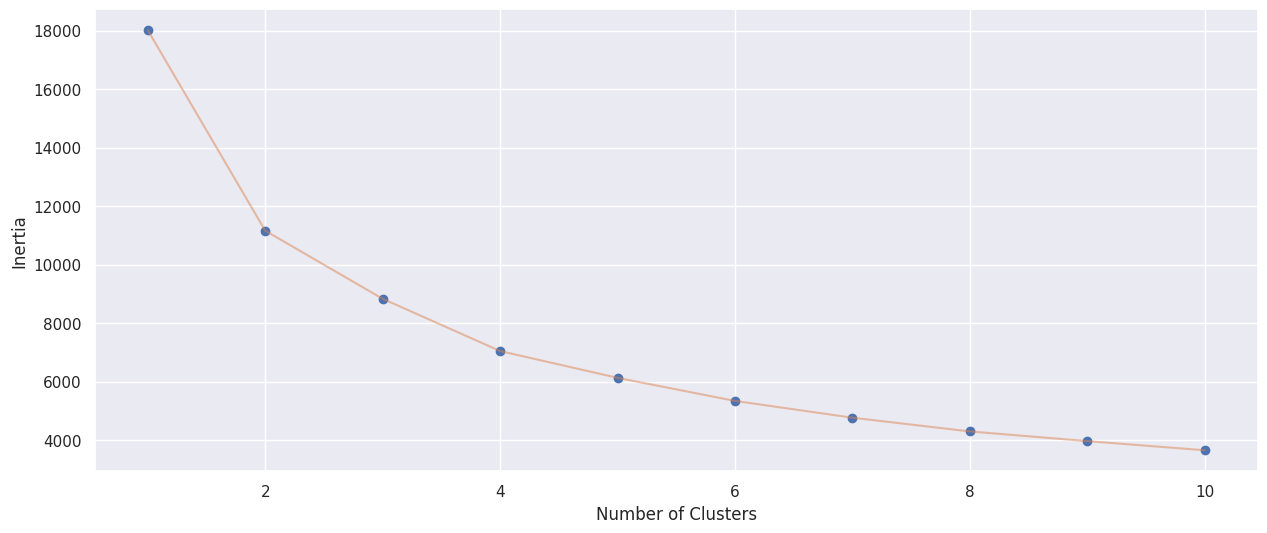

In [98]:
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(comp_prin_marg_est)
    inertia.append(model.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

In [100]:
kmeans_est=KMeans(5)
kmeans_est.fit(datos_scaled)
indentified_clusters_pca_est = kmeans_est.fit_predict(comp_prin_marg)
data_with_clusters_pca_est = comp_prin_marg.copy()
data_with_clusters_pca_est['Clusters'] = indentified_clusters_pca_est
data_with_clusters_pca_est=data_with_clusters_pca_est
print(data_with_clusters_pca_est)

result_est = data_with_clusters_pca_est.dtypes

print("Output:")

      principal component 1  principal component 2  principal component 3  \
0                 -3.847822               1.199462              -0.410835   
1                 -1.391098              -0.135314               0.569230   
2                 -1.542479              -0.322899               0.166443   
3                 -1.700064              -0.154769               0.219273   
4                 -3.021976               0.804573              -0.138147   
...                     ...                    ...                    ...   
2464              -0.529294              -0.760038               0.827796   
2465              -1.398222              -0.283976               0.553057   
2466              -3.774185               1.164255              -0.415447   
2467              -1.642171               0.429154              -0.346940   
2468              -1.029337              -0.769002               0.888414   

      principal component 4  label  Clusters  
0                 -0.214396 

In [103]:
y_pca_est = np.array(data_with_clusters_pca_est["Clusters"])

comp_prin_marg['y_pca_est'] = y_pca_est

comp_prin_marg
kmeans_pca_est=kmeans.fit(comp_prin_marg)

**Gráfico de los datos estandarizados por clústeres**

Aunque los colores cambian, se identifican que los clústeres con los datos estandarizados para los componentes principales son similares a los sin estandarizar para los primeros dos componentes. No obstante, para los datos sin estandarizar se sugieren 4 componentes (que explican el 81% de la varianza total). Los otros componentes no ayudan a identificar los elementos en cada clúster. 

<Figure size 640x480 with 0 Axes>

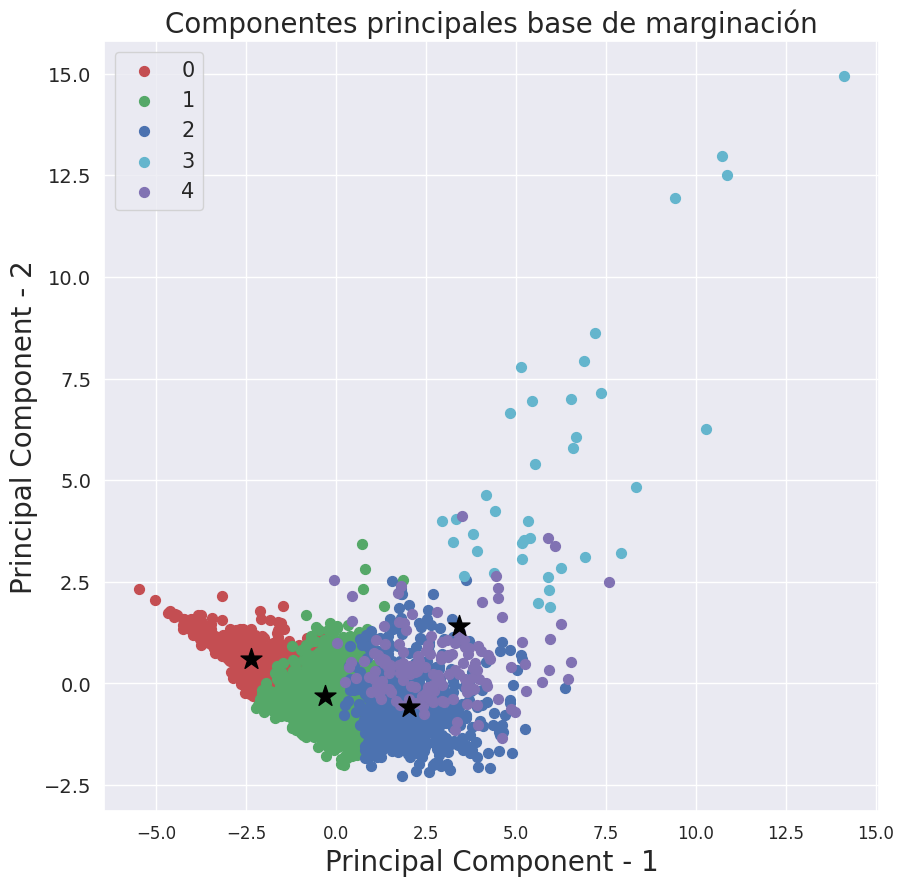

In [105]:
#Componente 1 y 2
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Componentes principales base de marginación",fontsize=20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = comp_prin_marg['y_pca_est'] == target
    plt.scatter(comp_prin_marg.loc[indicesToKeep, 'principal component 1']
               , comp_prin_marg.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
    
plt.legend(targets,prop={'size': 15})

<Figure size 640x480 with 0 Axes>

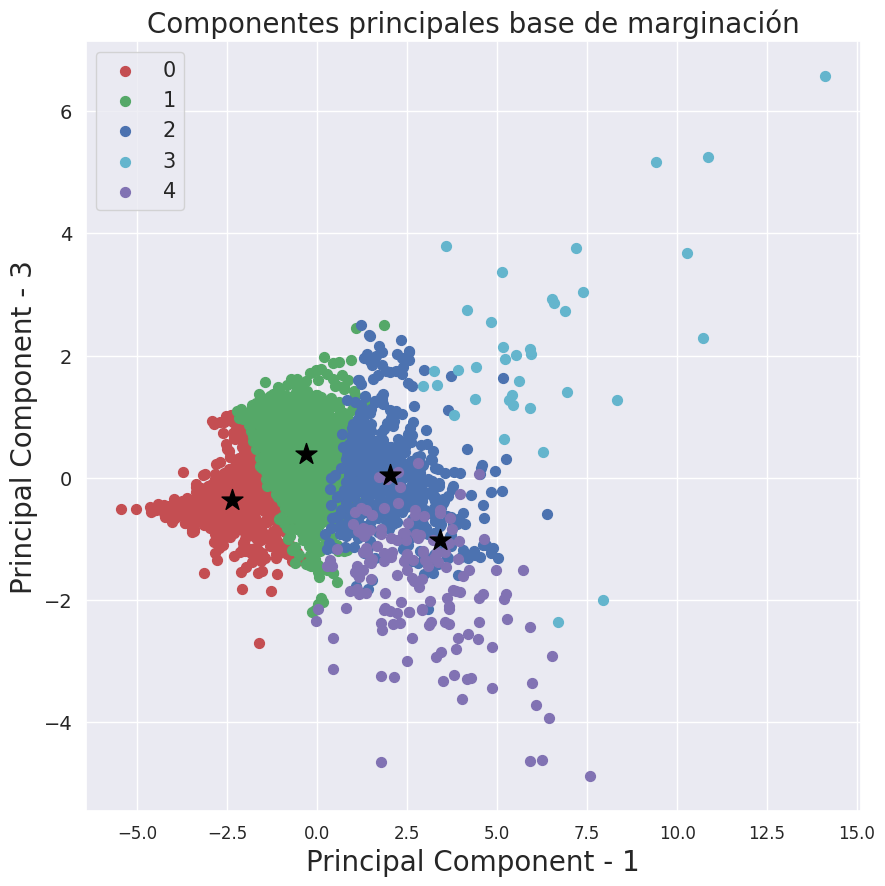

In [106]:
#Componente 1 y 3
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 3',fontsize=20)
plt.title("Componentes principales base de marginación",fontsize=20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = comp_prin_marg['y_pca_est'] == target
    plt.scatter(comp_prin_marg.loc[indicesToKeep, 'principal component 1']
               , comp_prin_marg.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
    
plt.legend(targets,prop={'size': 15})

<Figure size 640x480 with 0 Axes>

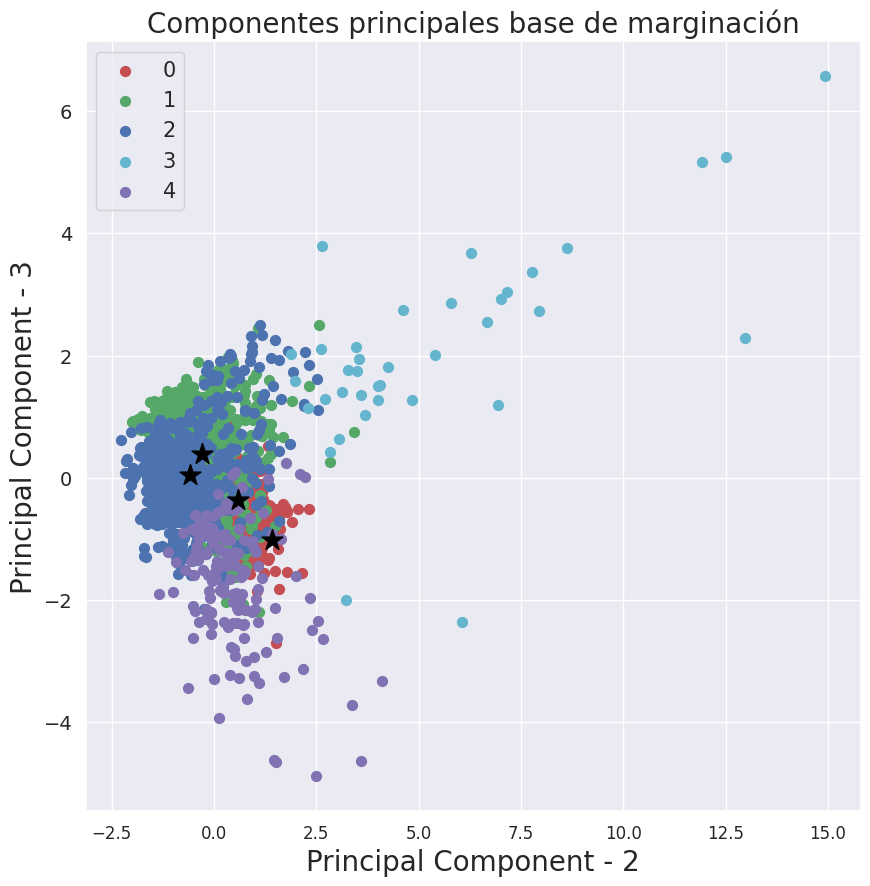

In [107]:
#Componente 2 y 3
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 2',fontsize=20)
plt.ylabel('Principal Component - 3',fontsize=20)
plt.title("Componentes principales base de marginación",fontsize=20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = comp_prin_marg['y_pca_est'] == target
    plt.scatter(comp_prin_marg.loc[indicesToKeep, 'principal component 2']
               , comp_prin_marg.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)
    
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
    
plt.legend(targets,prop={'size': 15})

<Figure size 640x480 with 0 Axes>

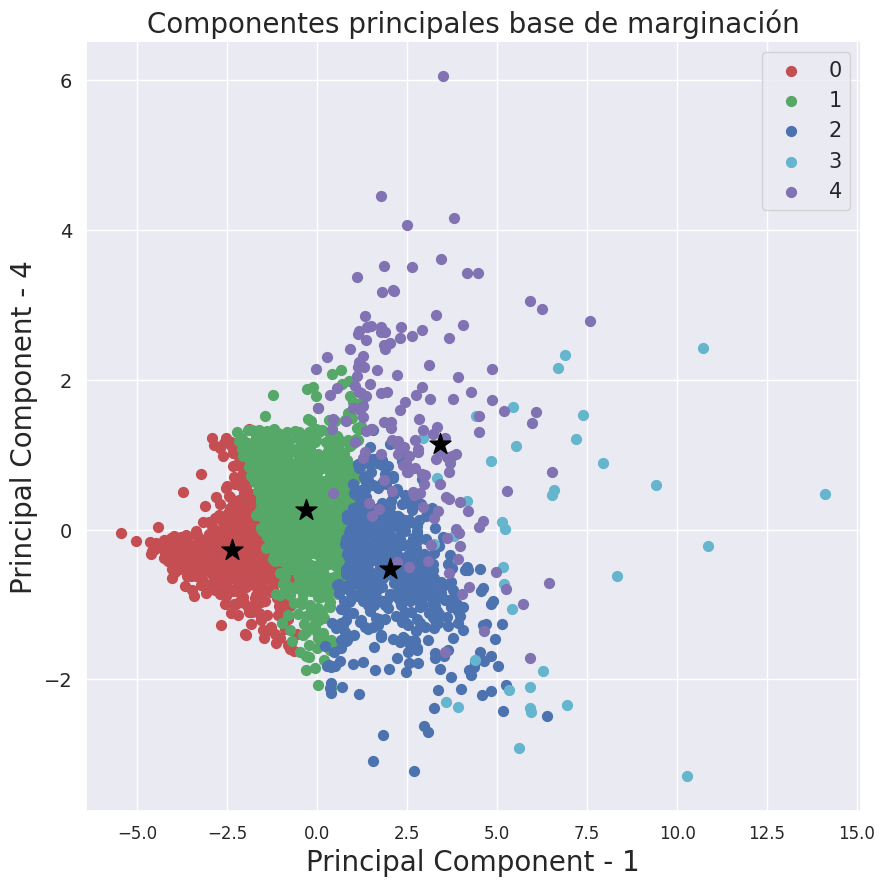

In [108]:
#Componente 1 y 4
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 4',fontsize=20)
plt.title("Componentes principales base de marginación",fontsize=20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = comp_prin_marg['y_pca_est'] == target
    plt.scatter(comp_prin_marg.loc[indicesToKeep, 'principal component 1']
               , comp_prin_marg.loc[indicesToKeep, 'principal component 4'], c = color, s = 50)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=250, marker='*', c='black', edgecolor='black',
    label='centroids')
    
plt.legend(targets,prop={'size': 15})

**Comparación de PCA con datos estandarizados y sin estandarizar en el mapa**

Datos sin estandarizar

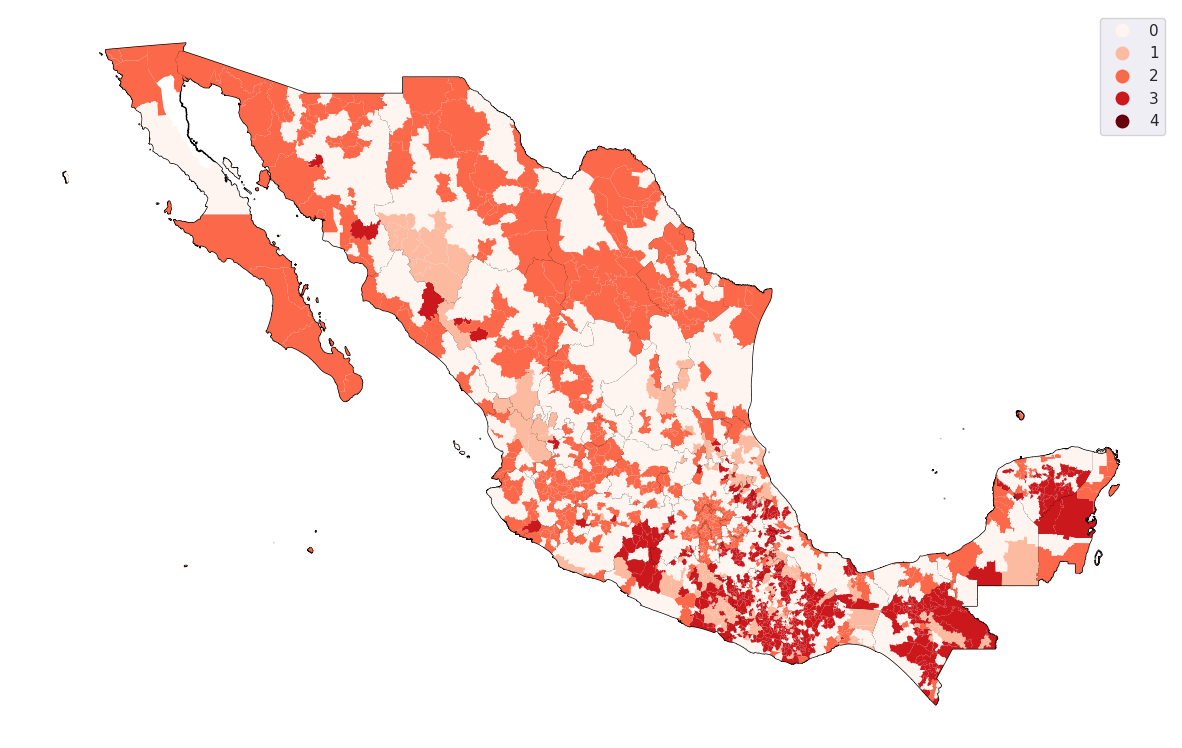

In [109]:
#generamos una copia de los datos originales para graficar el mapa con los clusters generados
marg_municipal_cop= marg_municipal
#guardamos los clusters generados con los datos originales
y = np.array(data_with_clusters_pca_sinest["Clusters"])
#guardamos los clusters generados con los datos estandarizados
y_est = np.array(data_with_clusters_pca_est["Clusters"])
#montamos los cluster a los municipios
marg_municipal_cop['Clusters'] = y 
marg_municipal_cop['Clusters_estand'] = y_est

# une la información cartográfica y del IM
layer_marg_2 = layer.merge(marg_municipal_cop, left_on='CVEGEO',right_on='CVE_MUN')
layer_marg_2 

# especifica la variable GM_2020 como categórica (el IM en 5 niveles)
im_cat_2 = pd.CategoricalIndex(layer_marg_2['Clusters'], categories=[0, 1, 2, 3, 4],)

# grafica el indicador a nivel municipal
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax) 
# mapa de los municipios con su IM
layer_marg_2.plot(column='Clusters', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds",categories = [0, 1, 2, 3, 4]) 
# Remove axis
ax.set_axis_off()
plt.show()

Datos estandarizados:

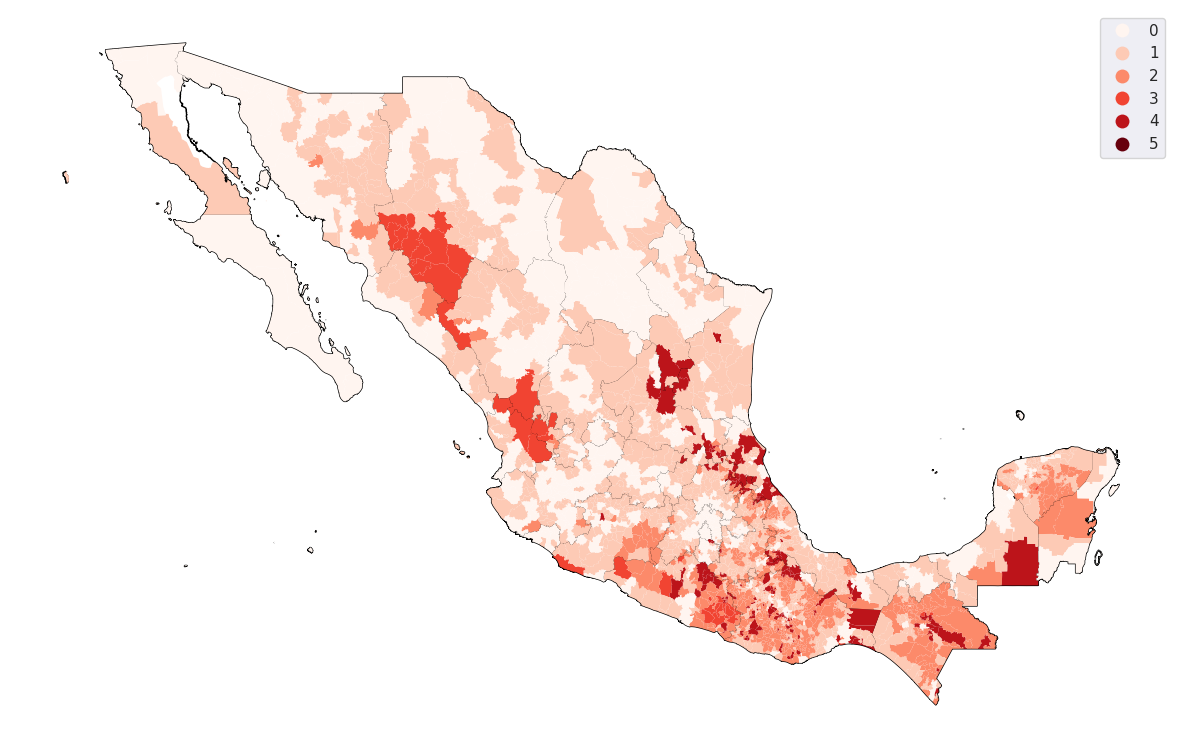

In [110]:
# especifica la variable GM_2020 como categórica (el IM en 5 niveles)
im_cat_2 = pd.CategoricalIndex(layer_marg_2['Clusters_estand'], categories=[0, 1, 2, 3, 4, 5],)

# grafica el indicador a nivel municipal
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax) 
# mapa de los municipios con su IM
layer_marg_2.plot(column='Clusters_estand', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds",categories = [0, 1, 2, 3, 4, 5]) 
# Remove axis
ax.set_axis_off()
plt.show()

## PCA-Kernel

Para este ejercicio usaremos Kernel PCA, el cual es una extensión del Análisis de Componentes Principales (PCA) mediante el uso de métodos de Kernel, lo cual permite usar PCA en espacios de alta dimensionalidad.

Para ello, primero haremos aplicaremos el KernelPCA para identificar los componentes principales (buscamos que los componentes seleccionados contribuyan a explicar al menos el 80% de la varianza total del sistema). Posteriormente, usaremos kmeans para identificar los clústeres a los PCA que generamos. 

**Importamos las librerías**

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy.stats import norm

from sklearn.decomposition import KernelPCA


**Identificando los PCA mediante KPCA (datos sin estandarizar)**

Primero aplicamos KPCA para identificar el número de Componentes, en donde se identifica que los primeros dos componentes explican el 86% de la varianza total, los cuáles utilizaremos para identificar el número de clústers. 

In [72]:
#Kernel PCA con datos sin estandarizar

kpca = KernelPCA(n_components=None, kernel='poly', gamma=2, degree=1)
scores_kpca = kpca.fit_transform(base_marg)

scores = pd.DataFrame(dict(pc1=scores_kpca[:,0],pc2=scores_kpca[:,1],cl=y))


In [112]:
X_transformed = kpca.fit_transform(base_marg)

In [113]:
#Varianza explicada (es nuevo, 28 de marzo de 2023)
explained_variance = np.var(X_transformed, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
np.cumsum(explained_variance_ratio)
#Nos quedamos con 2 componentes principales, 
#los cuales explican el 86.51% de la varianza

array([0.73226449, 0.86511724, 0.90620907, 0.93641208, 0.96280089,
       0.9793287 , 0.99085553, 0.99800887, 1.        ])

Creamos un dataframe con los 2 componentes principales. 

In [114]:
X_transformed_reducido=pd.DataFrame(X_transformed.copy())
X_transformed_reducido.drop(X_transformed_reducido.columns[[2,3,4,5,6,7,8]], 
                            axis=1, inplace=True)
X_transformed_reducido

0          1
0     104.573385 -19.076290
1      -2.170553 -24.555511
2      30.001112  -6.986110
3      16.016330 -21.094388
4      61.727335 -24.199858
...          ...        ...
2464  -35.792851 -26.428558
2465   21.772345  -9.505715
2466  104.016720 -18.282128
2467   76.494352  10.628255
2468  -33.958274 -31.658613

[2469 rows x 2 columns]

**Identificando el número de clusters por Kmeans (datos sin estandarizar)**

En la gráfica de codo, la inercia nos sugiere seleccionar entre 2 y 4 clústeres. En este ejercicio probaremos con 4 clústeres. 

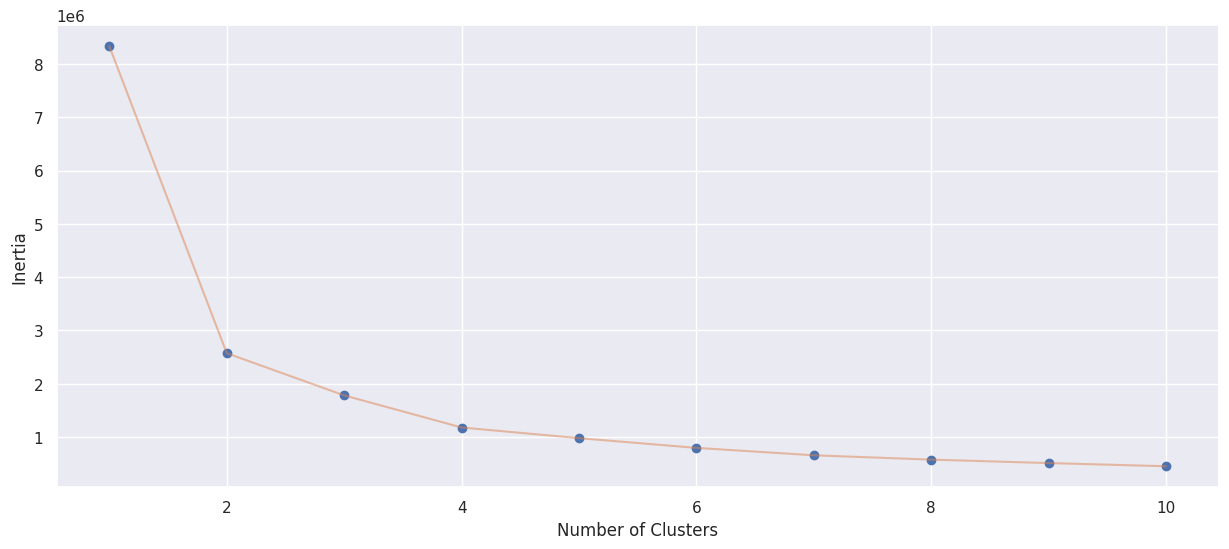

In [115]:
#Analizamos el número de clusters sugeridos para los datos de Kernel PCA

inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(X_transformed_reducido)
    inertia.append(model.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

#En la siguiente gráfica se muestra que podríamos seleccionar entre 2 y 4 clústeres

In [145]:
#Especificamos el número de clusters para el objeto KMeans
kmeans=KMeans(n_clusters=4)

#Analizamos el clustering de los datos de la base de marg_municipal y vemos el resultado
kmeans.fit(X_transformed_reducido)


indentified_clusters_kmeans = kmeans.fit_predict(X_transformed_reducido)
data_with_clusters_k_sinest = X_transformed_reducido.copy()
data_with_clusters_k_sinest['Clusters_K']=indentified_clusters_kmeans
indentified_clusters

array([0, 1, 2, ..., 0, 0, 1], dtype=int32)

**Grafica de los componentes principales y los clústeres (datos sin estandarizar)**

El Kernel PCA arroja resultados muy similares a PCA con datos sin estandarizar. De hecho, el componente principal 1, ayuda a distinguir entre los elementos de los clústeres 0,3 con 1 y 2, mientras que el componente dos ayuda a distinguir entre los elementos de los clústeres 1 y 2.

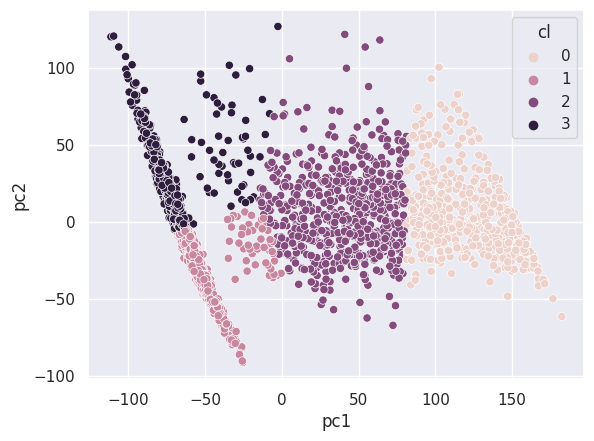

In [147]:
#Kernel PCA polinomial con datos sin estandarizar
kpca = KernelPCA(n_components=None, kernel='poly', gamma=2, degree=1)
scores_kpca = kpca.fit_transform(X_transformed_reducido)

scores = pd.DataFrame(dict(pc1=scores_kpca[:,0],pc2=scores_kpca[:,1],cl=indentified_clusters))
sns.scatterplot(data=scores, x='pc1', y='pc2', hue='cl')
plt.show()

**Identificando los PCA mediante KPCA (datos estandarizados)**

Primero aplicamos KPCA para identificar el número de Componentes a los datos estandarizados, en donde se identifica que los primeros cuatro componentes explican el 81% de la varianza total, los cuáles utilizaremos para identificar el número de clústers. 

In [151]:
#Kernel PCA con datos estandarizados

kpca = KernelPCA(n_components=None, kernel='poly', gamma=2, degree=1)
scores_kpca = kpca.fit_transform(datos_scaled)

scores = pd.DataFrame(dict(pc1=scores_kpca[:,0],pc2=scores_kpca[:,1],cl=y))
#sns.scatterplot(data=scores, x='pc1', y='pc2', hue='cl')
#plt.show()

In [152]:
######Desde aquí saco primero KernelPCA para ver los componentes que salen
#A eso veo cuántos clústeres se sugieren a los componentes 
X_transformed_esc = kpca.fit_transform(datos_scaled)

In [154]:
#Varianza explicada (es nuevo, 28 de marzo de 2023)
explained_variance_esc = np.var(X_transformed_esc, axis=0)
explained_variance_ratio_esc = explained_variance_esc / np.sum(explained_variance_esc)
np.cumsum(explained_variance_ratio_esc)
#Nos quedamos con 4 componentes principales, 
#los cuales explican el 81% de la varianza

array([0.49168927, 0.63449535, 0.72788288, 0.81057461, 0.87350614,
       0.91778006, 0.9539763 , 0.98142991, 1.        ])

Creamos un dataframe con los 4 componentes principales

In [155]:
X_transformed_reducido_esc=pd.DataFrame(X_transformed_esc.copy())
X_transformed_reducido_esc.drop(X_transformed_reducido_esc.columns[[4,5,6,7,8]], 
                            axis=1, inplace=True)
X_transformed_reducido_esc

0         1         2         3
0    -5.441642  1.696295 -0.581009 -0.303202
1    -1.967310 -0.191362  0.805013  0.188222
2    -2.181395 -0.456648  0.235385 -0.005891
3    -2.404253 -0.218877  0.310099  0.036415
4    -4.273720  1.137838 -0.195369 -0.086555
...        ...       ...       ...       ...
2464 -0.748535 -1.074856  1.170680  0.689084
2465 -1.977384 -0.401602  0.782141  0.318145
2466 -5.337504  1.646505 -0.587531 -0.145525
2467 -2.322381  0.606915 -0.490647 -0.957214
2468 -1.455703 -1.087533  1.256407  0.935950

[2469 rows x 4 columns]

**Identificando el número de clusters por Kmeans (datos estandarizados)**

En la gráfica de codo, la inercia nos sugiere seleccionar entre 4 y 6 clústeres. En este ejercicio probaremos con 4 clústeres. 

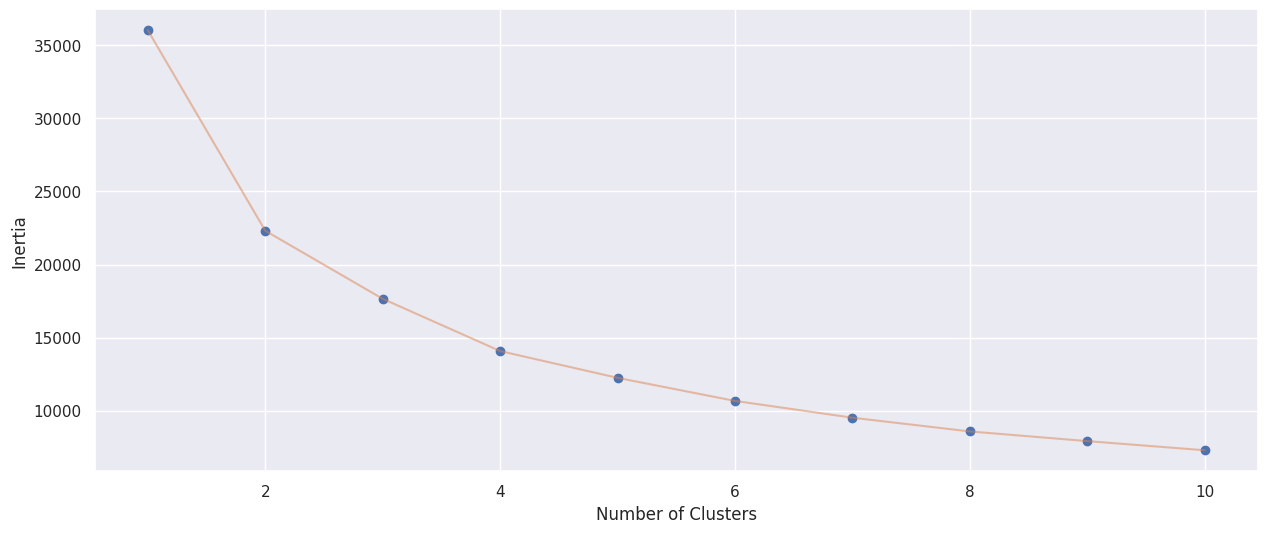

In [156]:
#Analizamos el número de clusters sugeridos para los datos de Kernel PCA

inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(X_transformed_reducido_esc)
    inertia.append(model.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

#En la siguiente gráfica se muestra que podríamos seleccionar entre 4 y 6 clústeres

In [174]:
#Especificamos el número de clusters para el objeto KMeans
kmeans_K_esc=KMeans(n_clusters=4)

#Analizamos el clustering de los datos de la base de marg_municipal y vemos el resultado
kmeans_K_esc.fit(X_transformed_reducido_esc)


indentified_clusters_k_esc = kmeans_K_esc.fit_predict(X_transformed_reducido_esc)
data_with_clusters_k_est = X_transformed_reducido_esc.copy()
data_with_clusters_k_est["Cluster_K_est"]=indentified_clusters_k_esc 
indentified_clusters_k_esc

array([2, 2, 2, ..., 2, 2, 0], dtype=int32)

**Grafica de los componentes principales y los clústeres (datos estandarizados)**

El Kernel PCA arroja resultados muy similares a PCA con datos estandarizados, en donde los primeros dos componentes son los que apoyan en mejor medida a identificar y separar a los elementos de cada clúster.

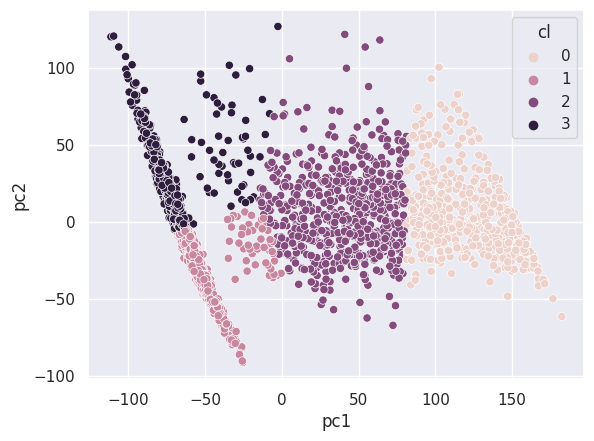

In [175]:
#Kernel PCA polinomial con datos sin estandarizar (PCA 1 y 2)
kpca = KernelPCA(n_components=None, kernel='poly', gamma=2, degree=1)
scores_kpca = kpca.fit_transform(X_transformed_reducido)

scores = pd.DataFrame(dict(pc1=scores_kpca[:,0],pc2=scores_kpca[:,1],cl=indentified_clusters))
sns.scatterplot(data=scores, x='pc1', y='pc2', hue='cl')
plt.show()

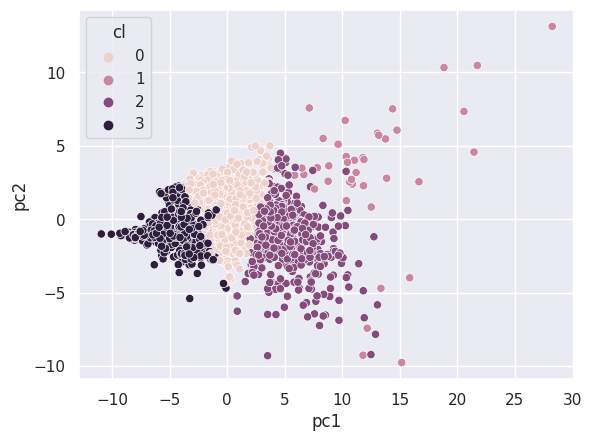

In [87]:
#Kernel PCA polinomial con datos sin estandarizar (PCA 1 y 3)
kpca = KernelPCA(n_components=None, kernel='poly', gamma=2, degree=1)
scores_kpca = kpca.fit_transform(X_transformed_reducido)

scores = pd.DataFrame(dict(pc1=scores_kpca[:,0],pc2=scores_kpca[:,2],cl=indentified_clusters))
sns.scatterplot(data=scores, x='pc1', y='pc2', hue='cl')
plt.show()

In [176]:
#Kernel PCA polinomial con datos sin estandarizar (PCA 2 y 3)
kpca = KernelPCA(n_components=None, kernel='poly', gamma=2, degree=1)
scores_kpca = kpca.fit_transform(X_transformed_reducido)

scores = pd.DataFrame(dict(pc1=scores_kpca[:,1],pc2=scores_kpca[:,2],cl=indentified_clusters))
sns.scatterplot(data=scores, x='pc1', y='pc2', hue='cl')
plt.show()

IndexError: ignored

In [ ]:
#Kernel PCA polinomial con datos sin estandarizar (PCA 1 y 4)
kpca = KernelPCA(n_components=None, kernel='poly', gamma=2, degree=1)
scores_kpca = kpca.fit_transform(X_transformed_reducido)

scores = pd.DataFrame(dict(pc1=scores_kpca[:,0],pc2=scores_kpca[:,3],cl=indentified_clusters))
sns.scatterplot(data=scores, x='pc1', y='pc2', hue='cl')
plt.show()

**Comparación de Kernel PCA con los mapas**

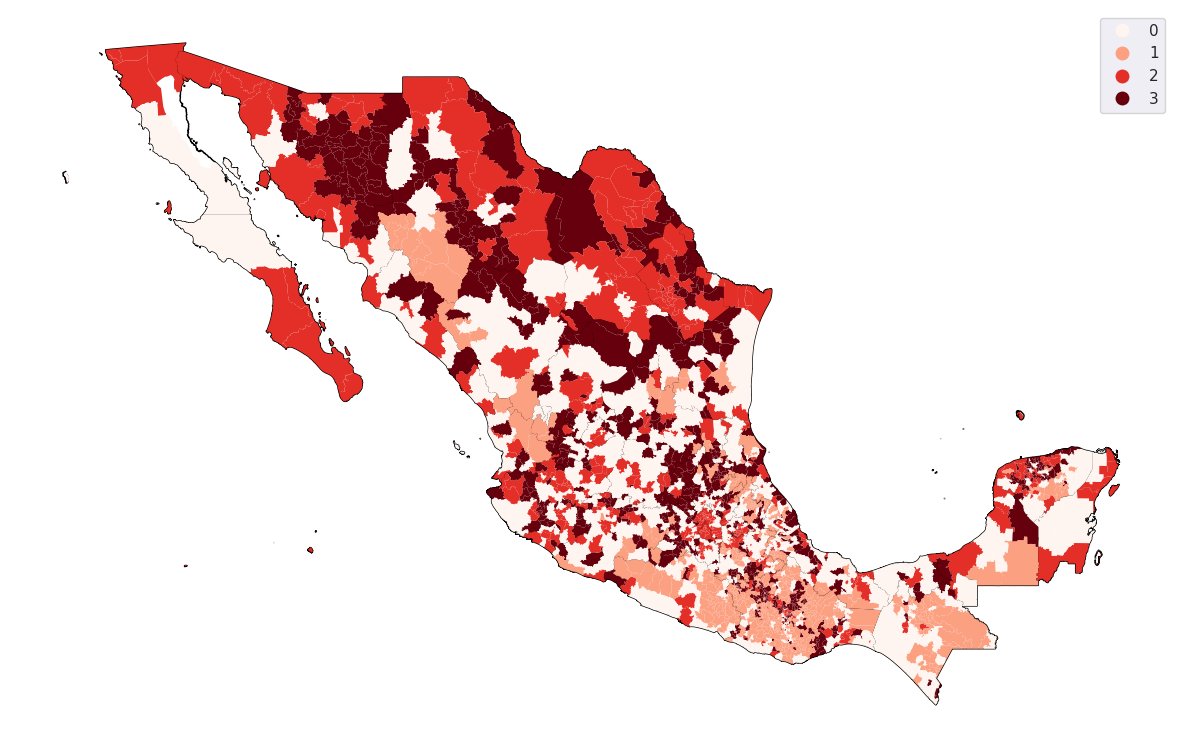

In [177]:
#generamos una copia de los datos originales para graficar el mapa con los clusters generados
marg_municipal_cop= marg_municipal
#guardamos los clusters generados con los datos originales
y_KPCA = np.array(data_with_clusters_k_sinest['Clusters_K'])
#guardamos los clusters generados con los datos estandarizados
y_est_KPCA = np.array(data_with_clusters_k_est["Cluster_K_est"])
#montamos los cluster a los municipios
marg_municipal_cop['Clusters_KPCA'] = y_KPCA 
marg_municipal_cop['Clusters_estand_KPCA'] = y_est_KPCA
im_cat_2_KPCA = pd.CategoricalIndex(layer_marg_2_KPCA['Clusters_KPCA'], categories=[0, 1, 2, 3],)

# une la información cartográfica y del IM
layer_marg_2_KPCA = layer.merge(marg_municipal_cop, left_on='CVEGEO',right_on='CVE_MUN')
layer_marg_2_KPCA

# especifica la variable GM_2020 como categórica (el IM en 5 niveles)
im_cat_2_KPCA = pd.CategoricalIndex(layer_marg_2_KPCA['Clusters_KPCA'], categories=[0, 1, 2, 3],)

# grafica el indicador a nivel municipal
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax) 
# mapa de los municipios con su IM
layer_marg_2_KPCA.plot(column='Clusters_KPCA', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds",categories = [0, 1, 2, 3]) 
# Remove axis
ax.set_axis_off()
plt.show()

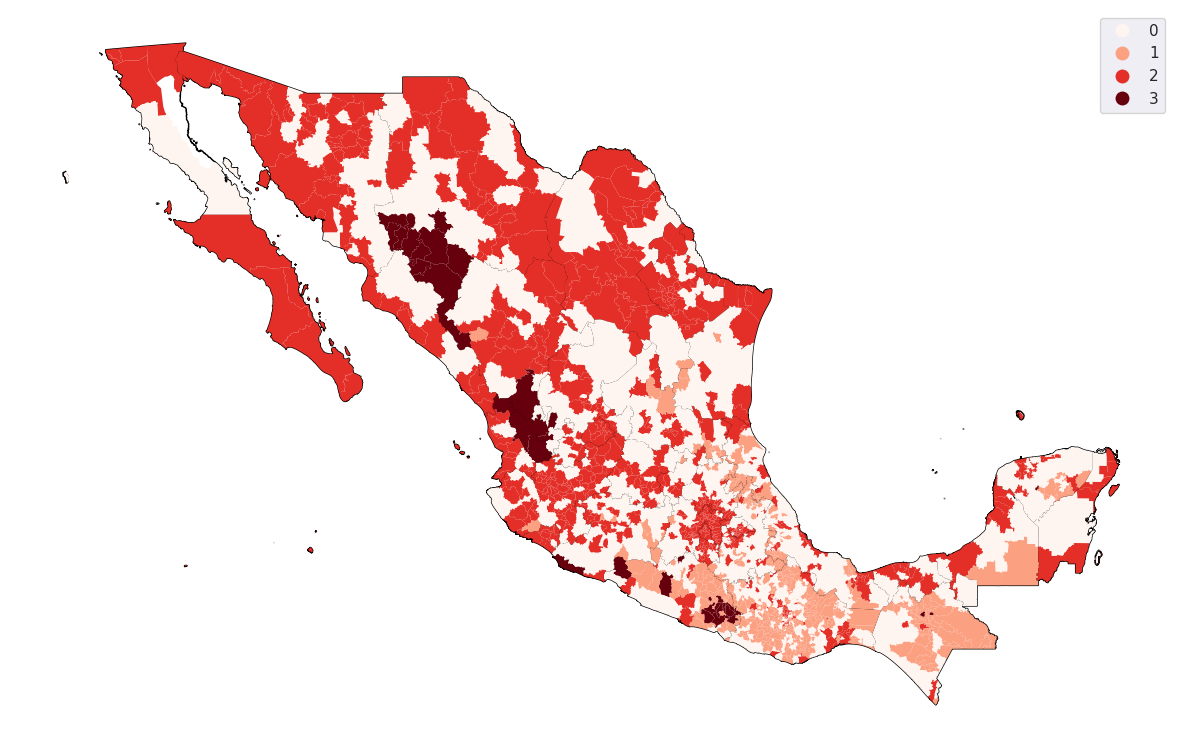

In [178]:
# especifica la variable GM_2020 como categórica (el IM en 5 niveles)
im_cat_2_KPCA = pd.CategoricalIndex(layer_marg_2_KPCA['Clusters_estand_KPCA'], categories=[0, 1, 2, 3],)

# grafica el indicador a nivel municipal
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax) 
# mapa de los municipios con su IM
layer_marg_2_KPCA.plot(column='Clusters_estand_KPCA', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Reds",categories = [0, 1, 2, 3]) 
# Remove axis
ax.set_axis_off()
plt.show()


## Conclusiones

Analizando los resultados obtenidos mediante K-means, PCA y Kernel PCA se observa lo siguiente:

- Los tres modelos se desempeñan de mejor forma cuando los datos no son estandarizados. Lo anterior se debe a que los datos ya no necesitan ser escalados porque son índices y ya están en una misma magnitud. Al estandarizar, es menos nítida la diferencia de los elementos en cada clúster. 
- En PCA y kernel-PCA 2 en los datos sin estandarizar se identifica que 2 componentes principales (p=2 dimensiones) explica más del 80% de la varianza total. No obstante, al usar los datos estandarizados, se requieren hasta 4 componentes principales.
- En promedio, en todos los modelos, los clústeres sugeridos se encuentran entre 4 y 6 de acuerdo a su inercia (brazo de codo). 
- Considerando los datos sin estandarizar, los datos de Kmeans arroja resultados similares a los agrupamientos de marginación hecho por CONAPO, en donde la variable más importante es el tamaño de la localidad (PL.5000), lo cual se puede deber a que estas localidades están alejadas de los servicios básicos como agua, luz, drenaje, salud y eduación.
- No obstante, en los datos sin estandarizar mediante PCA y KPCA, se puede explicar el efecto de las 9 variables de marginación en solamente dos factores, donde el primer componente atrapa casi en su mayor parte la variación causada por la variable PL.5000.
- Así, los resultados de PCA y Kernel PCA con datos sin estandarizar son adecuados para analizar en pocas dimensiones y en solamente 4 clústeres la marginación en México